In [67]:
import pandas as pd
import numpy as np
import seaborn as sns

#GRaphing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

#Womply Data

Look into how to read very large datasets

In [ ]:
womply_df = pd.read_csv('Womply_AZ 2.csv', error_bad_lines = False, engine = "python")
womply_df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





,date,state,county,tract,zipcode,mcc_code,root_category,sub_category,num_unique_cc,debit_revenue,credit_revenue,merchants,debit_transactions,credit_transactions,average_debit_revenue,average_credit_revenue,max_debit_revenue,min_debit_revenue,max_credit_revenue,min_credit_revenue,median_debit_revenue,median_credit_revenue,average_debit_transactions,average_credit_transactions,max_debit_transactions,min_debit_transactions,max_credit_transactions,min_credit_transactions,median_debit_transactions,median_credit_transactions,womply_predicted_revenue,root_category_id,category_id,revenue,yago_date,yago_revenue,yago_credit_revenue,yago_debit_revenue,yago_merchants,yago_debit_transactions,yago_credit_transactions,rowkey,zipcode_geocoded,county_centroid,countyregioncode,zipregioncode,concatenated_censustract
0,02/09/2020 12:00:00 AM,AZ,Apache County,970300.0,85936.0,5541,Vehicle Service And Accessories,Service Stations (With Or Without Ancillary Se...,154.0,0.0,3560.0,3.0,1.0,174.0,0.0,1190.0,0.0,0.0,1440.0,1060.0,-3.09,1180.00,1.0,58.0,1.0,1.0,70.0,52.0,1.0,52.0,true,353.0,367.0,3560.0,02/10/2019 12:00:00 AM,3440.0,3440.0,0.0,3.0,0.0,161.0,2020-02-09-5541-367-353-85936-Apache County970300,POINT (-109.27 34.65),POINT (-109.49 35.4),4001.0,85936.0,4.001970e+09
1,02/09/2020 12:00:00 AM,AZ,Apache County,970501.0,85938.0,7011,Travel,Lodging And Accommodations,13.0,0.0,3050.0,4.0,0.0,13.0,NaN,760.0,NaN,NaN,1850.0,50.0,NaN,576.45,NaN,4.0,0.0,0.0,5.0,1.0,NaN,4.0,false,318.0,328.0,3050.0,02/10/2019 12:00:00 AM,960.0,960.0,0.0,4.0,0.0,9.0,2020-02-09-7011-328-318-85938-Apache County970501,POINT (-109.34 34.15),POINT (-109.49 35.4),4001.0,85938.0,4.001971e+09
2,02/09/2020 12:00:00 AM,AZ,Apache County,970501.0,85938.0,3617,Travel,Lodging And Accommodations,37.0,0.0,7320.0,3.0,0.0,41.0,NaN,2440.0,NaN,NaN,3320.0,680.0,NaN,680.00,NaN,14.0,0.0,0.0,18.0,5.0,NaN,18.0,true,318.0,328.0,7320.0,02/10/2019 12:00:00 AM,6530.0,6530.0,0.0,3.0,0.0,33.0,2020-02-09-3617-328-318-85938-Apache County970501,POINT (-109.34 34.15),POINT (-109.49 35.4),4001.0,85938.0,4.001971e+09
3,02/09/2020 12:00:00 AM,AZ,Apache County,945001.0,86515.0,7832,Entertainment And Media,Movie Tickets,108.0,0.0,3760.0,3.0,0.0,138.0,NaN,1250.0,NaN,NaN,1580.0,590.0,NaN,590.00,NaN,46.0,0.0,0.0,48.0,42.0,NaN,48.0,true,71.0,84.0,3760.0,02/10/2019 12:00:00 AM,3390.0,3390.0,0.0,3.0,0.0,138.0,2020-02-09-7832-84-71-86515-Apache County945001,POINT (-108.95 35.68),POINT (-109.49 35.4),4001.0,86515.0,4.001945e+09
4,02/09/2020 12:00:00 AM,AZ,Cochise County,301.0,85602.0,5992,Gifts And Flowers,Florists,22.0,0.0,1130.0,3.0,0.0,24.0,NaN,380.0,NaN,NaN,520.0,100.0,NaN,100.00,NaN,8.0,0.0,0.0,12.0,1.0,NaN,12.0,true,159.0,161.0,1130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-09-5992-161-159-85602-Cochise County00...,POINT (-110.41 32.17),POINT (-109.75 31.88),4003.0,85602.0,4.003000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959353,03/21/2020 12:00:00 AM,AZ,Cochise County,1300.0,85616.0,7033,Travel,Trailer Parks Or Campgrounds,32.0,0.0,6160.0,3.0,0.0,34.0,NaN,2050.0,NaN,NaN,2620.0,930.0,NaN,930.00,NaN,12.0,0.0,0.0,12.0,11.0,NaN,12.0,true,318.0,341.0,6160.0,03/23/2019 12:00:00 AM,8330.0,8310.0,-20.0,3.0,1.0,40.0,2020-03-21-7033-341-318-85616-Cochise County00...,POINT (-110.32 31.7),POINT (-109.75 31.88),4003.0,85616.0,4.003001e+09
959354,03/21/2020 12:00:00 AM,AZ,Cochise County,500.0,85617.0,5422,Food Retail And Service,Freezer And Locker Meat Provisioners,160.0,0.0,6150.0,3.0,0.0,170.0,NaN,2050.0,NaN,NaN,2760.0,620.0,NaN,620.00,NaN,57.0,0.0,0.0,79.0,13.0,NaN,79.0,true,120.0,138.0,6150.0,03/23/2019 12:00:00 AM,3740.0,3740.0,0.0,3.0,0.0,127.0,2020-03-21-5422-138-120-85617-Cochise County00...,POINT (-109.71 31.52),POINT (-109.75 31.88),4003.0,85617.0,4.003000e+09
959355,09/28/2020 12:00:00 AM,AZ,Pima County,1302.0,85705.0,7217,Home And Garden,Carpet And Upholstery Cleaning

This doesnt read in the correct amount of rows for some reason. 

In [ ]:
womply_df.dtypes

date                            object
state                           object
county                          object
tract                          float64
zipcode                        float64
mcc_code                        object
root_category                   object
sub_category                    object
num_unique_cc                  float64
debit_revenue                  float64
credit_revenue                 float64
merchants                      float64
debit_transactions             float64
credit_transactions            float64
average_debit_revenue          float64
average_credit_revenue         float64
max_debit_revenue              float64
min_debit_revenue              float64
max_credit_revenue             float64
min_credit_revenue             float64
median_debit_revenue           float64
median_credit_revenue          float64
average_debit_transactions     float64
average_credit_transactions    float64
max_debit_transactions         float64
min_debit_transactions   

In [ ]:
womply_df.shape

(959358, 47)

In [ ]:
womply_df.head(2)

,date,state,county,tract,zipcode,mcc_code,root_category,sub_category,num_unique_cc,debit_revenue,credit_revenue,merchants,debit_transactions,credit_transactions,average_debit_revenue,average_credit_revenue,max_debit_revenue,min_debit_revenue,max_credit_revenue,min_credit_revenue,median_debit_revenue,median_credit_revenue,average_debit_transactions,average_credit_transactions,max_debit_transactions,min_debit_transactions,max_credit_transactions,min_credit_transactions,median_debit_transactions,median_credit_transactions,womply_predicted_revenue,root_category_id,category_id,revenue,yago_date,yago_revenue,yago_credit_revenue,yago_debit_revenue,yago_merchants,yago_debit_transactions,yago_credit_transactions,rowkey,zipcode_geocoded,county_centroid,countyregioncode,zipregioncode,concatenated_censustract
0,02/09/2020 12:00:00 AM,AZ,Apache County,970300.0,85936.0,5541,Vehicle Service And Accessories,Service Stations (With Or Without Ancillary Se...,154.0,0.0,3560.0,3.0,1.0,174.0,0.0,1190.0,0.0,0.0,1440.0,1060.0,-3.09,1180.00,1.0,58.0,1.0,1.0,70.0,52.0,1.0,52.0,true,353.0,367.0,3560.0,02/10/2019 12:00:00 AM,3440.0,3440.0,0.0,3.0,0.0,161.0,2020-02-09-5541-367-353-85936-Apache County970300,POINT (-109.27 34.65),POINT (-109.49 35.4),4001.0,85936.0,4.001970e+09
1,02/09/2020 12:00:00 AM,AZ,Apache County,970501.0,85938.0,7011,Travel,Lodging And Accommodations,13.0,0.0,3050.0,4.0,0.0,13.0,NaN,760.0,NaN,NaN,1850.0,50.0,NaN,576.45,NaN,4.0,0.0,0.0,5.0,1.0,NaN,4.0,false,318.0,328.0,3050.0,02/10/2019 12:00:00 AM,960.0,960.0,0.0,4.0,0.0,9.0,2020-02-09-7011-328-318-85938-Apache County970501,POINT (-109.34 34.15),POINT (-109.49 35.4),4001.0,85938.0,4.001971e+09


In [ ]:
womply_df.columns

Index(['date', 'state', 'county', 'tract', 'zipcode', 'mcc_code',
       'root_category', 'sub_category', 'num_unique_cc', 'debit_revenue',
       'credit_revenue', 'merchants', 'debit_transactions',
       'credit_transactions', 'average_debit_revenue',
       'average_credit_revenue', 'max_debit_revenue', 'min_debit_revenue',
       'max_credit_revenue', 'min_credit_revenue', 'median_debit_revenue',
       'median_credit_revenue', 'average_debit_transactions',
       'average_credit_transactions', 'max_debit_transactions',
       'min_debit_transactions', 'max_credit_transactions',
       'min_credit_transactions', 'median_debit_transactions',
       'median_credit_transactions', 'womply_predicted_revenue',
       'root_category_id', 'category_id', 'revenue', 'yago_date',
       'yago_revenue', 'yago_credit_revenue', 'yago_debit_revenue',
       'yago_merchants', 'yago_debit_transactions', 'yago_credit_transactions',
       'rowkey', 'zipcode_geocoded', 'county_centroid', 'countyregi

In [ ]:
womply_df.isnull().sum()

date                                0
state                               1
county                              1
tract                           31657
zipcode                             1
mcc_code                            1
root_category                       1
sub_category                        1
num_unique_cc                       1
debit_revenue                       1
credit_revenue                      1
merchants                           1
debit_transactions                  1
credit_transactions                 1
average_debit_revenue          890114
average_credit_revenue              9
max_debit_revenue              890114
min_debit_revenue              890114
max_credit_revenue               3559
min_credit_revenue               3559
median_debit_revenue           890114
median_credit_revenue            3559
average_debit_transactions     890114
average_credit_transactions         9
max_debit_transactions              1
min_debit_transactions              1
max_credit_t

Getting percentage of null values

In [ ]:
womply_df.isnull().sum()/womply_df.shape[0]*100

date                            0.000000
state                           0.000104
county                          0.000104
tract                           3.299811
zipcode                         0.000104
mcc_code                        0.000104
root_category                   0.000104
sub_category                    0.000104
num_unique_cc                   0.000104
debit_revenue                   0.000104
credit_revenue                  0.000104
merchants                       0.000104
debit_transactions              0.000104
credit_transactions             0.000104
average_debit_revenue          92.782256
average_credit_revenue          0.000938
max_debit_revenue              92.782256
min_debit_revenue              92.782256
max_credit_revenue              0.370977
min_credit_revenue              0.370977
median_debit_revenue           92.782256
median_credit_revenue           0.370977
average_debit_transactions     92.782256
average_credit_transactions     0.000938
max_debit_transa

What is yago?

Column Breakdown:


*  Category: root_category, sub_category
*  Monetary: debit_transactions                  
credit_transactions                 
average_debit_revenue          
average_credit_revenue              
max_debit_revenue             
min_debit_revenue              
max_credit_revenue              
min_credit_revenue              
median_debit_revenue          
median_credit_revenue            
average_debit_transactions     
average_credit_transactions         
max_debit_transactions              
min_debit_transactions              
max_credit_transactions             
min_credit_transactions             
median_debit_transactions      
median_credit_transactions          
womply_predicted_revenue   
yago_revenue                   
yago_credit_revenue           
yago_debit_revenue            
yago_merchants                
yago_debit_transactions        
yago_credit_transactions     



*   List item
*   List item





In [ ]:
womply_df['date_parsed'] = womply_df['date'].astype(str).str[:10]
womply_df.head(3)

,index,date,state,county,tract,zipcode,mcc_code,root_category,sub_category,num_unique_cc,debit_revenue,credit_revenue,merchants,debit_transactions,credit_transactions,average_debit_revenue,average_credit_revenue,max_debit_revenue,min_debit_revenue,max_credit_revenue,min_credit_revenue,median_debit_revenue,median_credit_revenue,average_debit_transactions,average_credit_transactions,max_debit_transactions,min_debit_transactions,max_credit_transactions,min_credit_transactions,median_debit_transactions,median_credit_transactions,womply_predicted_revenue,root_category_id,category_id,revenue,yago_date,yago_revenue,yago_credit_revenue,yago_debit_revenue,yago_merchants,yago_debit_transactions,yago_credit_transactions,rowkey,zipcode_geocoded,county_centroid,countyregioncode,zipregioncode,concatenated_censustract,date_parsed,month,year
0,875910,01/01/2020 12:00:00 AM,AZ,Yavapai County,1102.0,86303.0,5945,Toys And Hobbies,"Hobby, Toy, And Game Shops",28.0,0.0,1160.0,3.0,0.0,30.0,NaN,390.0,NaN,NaN,570.0,20.0,NaN,20.0,NaN,10.0,0.0,0.0,14.0,2.0,NaN,14.0,true,314.0,316.0,1160.0,01/02/2019 12:00:00 AM,1270.0,1270.0,0.0,3.0,0.0,31.0,2020-01-01-5945-316-314-86303-Yavapai County00...,POINT (-112.47 34.49),POINT (-112.55 34.6),4025.0,86303.0,4.025001e+09,01/01/2020,01,2020
1,875734,01/01/2020 12:00:00 AM,AZ,Navajo County,965200.0,85901.0,5812,Food Retail And Service,Restaurant,172.0,0.0,5720.0,3.0,0.0,180.0,NaN,1910.0,NaN,NaN,2020.0,1850.0,NaN,1920.0,NaN,60.0,0.0,0.0,61.0,60.0,NaN,60.0,true,120.0,150.0,5720.0,01/02/2019 12:00:00 AM,3250.0,3250.0,0.0,3.0,0.0,130.0,2020-01-01-5812-150-120-85901-Navajo County965200,POINT (-110.02 34.31),POINT (-110.32 35.4),4017.0,85901.0,4.017965e+09,01/01/2020,01,2020
2,875735,01/01/2020 12:00:00 AM,AZ,Navajo County,964800.0,85901.0,5812,Food Retail And Service,Restaurant,137.0,0.0,5790.0,3.0,0.0,146.0,NaN,1930.0,NaN,NaN,2090.0,1850.0,NaN,1950.0,NaN,49.0,0.0,0.0,60.0,27.0,NaN,60.0,true,120.0,150.0,5790.0,01/02/2019 12:00:00 AM,3420.0,3420.0,0.0,3.0,0.0,94.0,2020-01-01-5812-150-120-85901-Navajo County964800,POINT (-110.02 34.31),POINT (-110.32 35.4),4017.0,85901.0,4.017965e+09,01/01/2020,01,2020


In [ ]:
womply_df['month'] = womply_df['date_parsed'].astype(str).str[:2]
womply_df['year'] = womply_df['date_parsed'].astype(str).str[6:]


In [ ]:
womply_df.head()

,index,date,state,county,tract,zipcode,mcc_code,root_category,sub_category,num_unique_cc,debit_revenue,credit_revenue,merchants,debit_transactions,credit_transactions,average_debit_revenue,average_credit_revenue,max_debit_revenue,min_debit_revenue,max_credit_revenue,min_credit_revenue,median_debit_revenue,median_credit_revenue,average_debit_transactions,average_credit_transactions,max_debit_transactions,min_debit_transactions,max_credit_transactions,min_credit_transactions,median_debit_transactions,median_credit_transactions,womply_predicted_revenue,root_category_id,category_id,revenue,yago_date,yago_revenue,yago_credit_revenue,yago_debit_revenue,yago_merchants,yago_debit_transactions,yago_credit_transactions,rowkey,zipcode_geocoded,county_centroid,countyregioncode,zipregioncode,concatenated_censustract,date_parsed,month,year
0,875910,01/01/2020 12:00:00 AM,AZ,Yavapai County,1102.0,86303.0,5945,Toys And Hobbies,"Hobby, Toy, And Game Shops",28.0,0.0,1160.0,3.0,0.0,30.0,NaN,390.0,NaN,NaN,570.0,20.0,NaN,20.0,NaN,10.0,0.0,0.0,14.0,2.0,NaN,14.0,true,314.0,316.0,1160.0,01/02/2019 12:00:00 AM,1270.0,1270.0,0.0,3.0,0.0,31.0,2020-01-01-5945-316-314-86303-Yavapai County00...,POINT (-112.47 34.49),POINT (-112.55 34.6),4025.0,86303.0,4.025001e+09,01/01/2020,01,2020
1,875734,01/01/2020 12:00:00 AM,AZ,Navajo County,965200.0,85901.0,5812,Food Retail And Service,Restaurant,172.0,0.0,5720.0,3.0,0.0,180.0,NaN,1910.0,NaN,NaN,2020.0,1850.0,NaN,1920.0,NaN,60.0,0.0,0.0,61.0,60.0,NaN,60.0,true,120.0,150.0,5720.0,01/02/2019 12:00:00 AM,3250.0,3250.0,0.0,3.0,0.0,130.0,2020-01-01-5812-150-120-85901-Navajo County965200,POINT (-110.02 34.31),POINT (-110.32 35.4),4017.0,85901.0,4.017965e+09,01/01/2020,01,2020
2,875735,01/01/2020 12:00:00 AM,AZ,Navajo County,964800.0,85901.0,5812,Food Retail And Service,Restaurant,137.0,0.0,5790.0,3.0,0.0,146.0,NaN,1930.0,NaN,NaN,2090.0,1850.0,NaN,1950.0,NaN,49.0,0.0,0.0,60.0,27.0,NaN,60.0,true,120.0,150.0,5790.0,01/02/2019 12:00:00 AM,3420.0,3420.0,0.0,3.0,0.0,94.0,2020-01-01-5812-150-120-85901-Navajo County964800,POINT (-110.02 34.31),POINT (-110.32 35.4),4017.0,85901.0,4.017965e+09,01/01/2020,01,2020
3,875736,01/01/2020 12:00:00 AM,AZ,Navajo County,961700.0,85901.0,7011,Travel,Lodging And Accommodations,20.0,0.0,3630.0,3.0,0.0,22.0,NaN,1210.0,NaN,NaN,1750.0,130.0,NaN,130.0,NaN,8.0,0.0,0.0,10.0,2.0,NaN,10.0,true,318.0,328.0,3630.0,01/02/2019 12:00:00 AM,4230.0,4230.0,0.0,3.0,0.0,24.0,2020-01-01-7011-328-318-85901-Navajo County961700,POINT (-110.02 34.31),POINT (-110.32 35.4),4017.0,85901.0,4.017962e+09,01/01/2020,01,2020
4,875737,01/01/2020 12:00:00 AM,AZ,Navajo County,961700.0,85929.0,7997,Sports And Outdoors,"Clubs–country Clubs, Membership (Athletic, Rec...",82.0,0.0,8800.0,3.0,0.0,90.0,NaN,2930.0,NaN,NaN,5650.0,1570.0,NaN,3300.0,NaN,30.0,0.0,0.0,56.0,17.0,NaN,17.0,true,305.0,310.0,8800.0,01/02/2019 12:00:00 AM,3190.0,3190.0,0.0,3.0,0.0,48.0,2020-01-01-7997-310-305-85929-Navajo County961700,POINT (-109.94 34.18),POINT (-110.32 35.4),4017.0,85929.0,4.017962e+09,01/01/2020,01,2020


Column of the difference between max and min date

why is yago date different from the regular date.

In [ ]:
womply_df['date_parsed'].sort_values().tail()

166163    12/31/2021
166164    12/31/2021
166165    12/31/2021
166167    12/31/2021
166428    12/31/2021
Name: date_parsed, dtype: object

In [ ]:
womply_df['date_parsed'].sort_values().head()

875910    01/01/2020
875734    01/01/2020
875735    01/01/2020
875736    01/01/2020
875737    01/01/2020
Name: date_parsed, dtype: object

The last date is january 8th 2022, the first date is Jan 01 2020

Seeing the date differences on both of the datasets

In [ ]:
#sorting the date values
womply_df = womply_df.sort_values(by = 'date_parsed').reset_index()

In [ ]:
womply_df.head()

,index,date,state,county,tract,zipcode,mcc_code,root_category,sub_category,num_unique_cc,debit_revenue,credit_revenue,merchants,debit_transactions,credit_transactions,average_debit_revenue,average_credit_revenue,max_debit_revenue,min_debit_revenue,max_credit_revenue,min_credit_revenue,median_debit_revenue,median_credit_revenue,average_debit_transactions,average_credit_transactions,max_debit_transactions,min_debit_transactions,max_credit_transactions,min_credit_transactions,median_debit_transactions,median_credit_transactions,womply_predicted_revenue,root_category_id,category_id,revenue,yago_date,yago_revenue,yago_credit_revenue,yago_debit_revenue,yago_merchants,yago_debit_transactions,yago_credit_transactions,rowkey,zipcode_geocoded,county_centroid,countyregioncode,zipregioncode,concatenated_censustract,date_parsed,month,year
0,875910,01/01/2020 12:00:00 AM,AZ,Yavapai County,1102.0,86303.0,5945,Toys And Hobbies,"Hobby, Toy, And Game Shops",28.0,0.0,1160.0,3.0,0.0,30.0,NaN,390.0,NaN,NaN,570.0,20.0,NaN,20.0,NaN,10.0,0.0,0.0,14.0,2.0,NaN,14.0,true,314.0,316.0,1160.0,01/02/2019 12:00:00 AM,1270.0,1270.0,0.0,3.0,0.0,31.0,2020-01-01-5945-316-314-86303-Yavapai County00...,POINT (-112.47 34.49),POINT (-112.55 34.6),4025.0,86303.0,4.025001e+09,01/01/2020,01,2020
1,875734,01/01/2020 12:00:00 AM,AZ,Navajo County,965200.0,85901.0,5812,Food Retail And Service,Restaurant,172.0,0.0,5720.0,3.0,0.0,180.0,NaN,1910.0,NaN,NaN,2020.0,1850.0,NaN,1920.0,NaN,60.0,0.0,0.0,61.0,60.0,NaN,60.0,true,120.0,150.0,5720.0,01/02/2019 12:00:00 AM,3250.0,3250.0,0.0,3.0,0.0,130.0,2020-01-01-5812-150-120-85901-Navajo County965200,POINT (-110.02 34.31),POINT (-110.32 35.4),4017.0,85901.0,4.017965e+09,01/01/2020,01,2020
2,875735,01/01/2020 12:00:00 AM,AZ,Navajo County,964800.0,85901.0,5812,Food Retail And Service,Restaurant,137.0,0.0,5790.0,3.0,0.0,146.0,NaN,1930.0,NaN,NaN,2090.0,1850.0,NaN,1950.0,NaN,49.0,0.0,0.0,60.0,27.0,NaN,60.0,true,120.0,150.0,5790.0,01/02/2019 12:00:00 AM,3420.0,3420.0,0.0,3.0,0.0,94.0,2020-01-01-5812-150-120-85901-Navajo County964800,POINT (-110.02 34.31),POINT (-110.32 35.4),4017.0,85901.0,4.017965e+09,01/01/2020,01,2020
3,875736,01/01/2020 12:00:00 AM,AZ,Navajo County,961700.0,85901.0,7011,Travel,Lodging And Accommodations,20.0,0.0,3630.0,3.0,0.0,22.0,NaN,1210.0,NaN,NaN,1750.0,130.0,NaN,130.0,NaN,8.0,0.0,0.0,10.0,2.0,NaN,10.0,true,318.0,328.0,3630.0,01/02/2019 12:00:00 AM,4230.0,4230.0,0.0,3.0,0.0,24.0,2020-01-01-7011-328-318-85901-Navajo County961700,POINT (-110.02 34.31),POINT (-110.32 35.4),4017.0,85901.0,4.017962e+09,01/01/2020,01,2020
4,875737,01/01/2020 12:00:00 AM,AZ,Navajo County,961700.0,85929.0,7997,Sports And Outdoors,"Clubs–country Clubs, Membership (Athletic, Rec...",82.0,0.0,8800.0,3.0,0.0,90.0,NaN,2930.0,NaN,NaN,5650.0,1570.0,NaN,3300.0,NaN,30.0,0.0,0.0,56.0,17.0,NaN,17.0,true,305.0,310.0,8800.0,01/02/2019 12:00:00 AM,3190.0,3190.0,0.0,3.0,0.0,48.0,2020-01-01-7997-310-305-85929-Navajo County961700,POINT (-109.94 34.18),POINT (-110.32 35.4),4017.0,85929.0,4.017962e+09,01/01/2020,01,2020


In [ ]:
# womply_df['year'] = womply_df['date_parsed'].dt.year
# womply_df['month'] = womply_df['date_parsed'].dt.month
# womply_df['week_num'] = womply_df['date_parsed'].dt.weekofyear
# womply_df['weekday'] = womply_df['date_parsed'].dt.weekday_name


In [ ]:
womply_df.head(20)

,index,date,state,county,tract,zipcode,mcc_code,root_category,sub_category,num_unique_cc,debit_revenue,credit_revenue,merchants,debit_transactions,credit_transactions,average_debit_revenue,average_credit_revenue,max_debit_revenue,min_debit_revenue,max_credit_revenue,min_credit_revenue,median_debit_revenue,median_credit_revenue,average_debit_transactions,average_credit_transactions,max_debit_transactions,min_debit_transactions,max_credit_transactions,min_credit_transactions,median_debit_transactions,median_credit_transactions,womply_predicted_revenue,root_category_id,category_id,revenue,yago_date,yago_revenue,yago_credit_revenue,yago_debit_revenue,yago_merchants,yago_debit_transactions,yago_credit_transactions,rowkey,zipcode_geocoded,county_centroid,countyregioncode,zipregioncode,concatenated_censustract,date_parsed,month,year
0,875910,01/01/2020 12:00:00 AM,AZ,Yavapai County,1102.0,86303.0,5945,Toys And Hobbies,"Hobby, Toy, And Game Shops",28.0,0.0,1160.0,3.0,0.0,30.0,NaN,390.0,NaN,NaN,570.0,20.0,NaN,20.0,NaN,10.0,0.0,0.0,14.0,2.0,NaN,14.0,true,314.0,316.0,1160.0,01/02/2019 12:00:00 AM,1270.0,1270.0,0.0,3.0,0.0,31.0,2020-01-01-5945-316-314-86303-Yavapai County00...,POINT (-112.47 34.49),POINT (-112.55 34.6),4025.0,86303.0,4.025001e+09,01/01/2020,01,2020
1,875734,01/01/2020 12:00:00 AM,AZ,Navajo County,965200.0,85901.0,5812,Food Retail And Service,Restaurant,172.0,0.0,5720.0,3.0,0.0,180.0,NaN,1910.0,NaN,NaN,2020.0,1850.0,NaN,1920.0,NaN,60.0,0.0,0.0,61.0,60.0,NaN,60.0,true,120.0,150.0,5720.0,01/02/2019 12:00:00 AM,3250.0,3250.0,0.0,3.0,0.0,130.0,2020-01-01-5812-150-120-85901-Navajo County965200,POINT (-110.02 34.31),POINT (-110.32 35.4),4017.0,85901.0,4.017965e+09,01/01/2020,01,2020
2,875735,01/01/2020 12:00:00 AM,AZ,Navajo County,964800.0,85901.0,5812,Food Retail And Service,Restaurant,137.0,0.0,5790.0,3.0,0.0,146.0,NaN,1930.0,NaN,NaN,2090.0,1850.0,NaN,1950.0,NaN,49.0,0.0,0.0,60.0,27.0,NaN,60.0,true,120.0,150.0,5790.0,01/02/2019 12:00:00 AM,3420.0,3420.0,0.0,3.0,0.0,94.0,2020-01-01-5812-150-120-85901-Navajo County964800,POINT (-110.02 34.31),POINT (-110.32 35.4),4017.0,85901.0,4.017965e+09,01/01/2020,01,2020
3,875736,01/01/2020 12:00:00 AM,AZ,Navajo County,961700.0,85901.0,7011,Travel,Lodging And Accommodations,20.0,0.0,3630.0,3.0,0.0,22.0,NaN,1210.0,NaN,NaN,1750.0,130.0,NaN,130.0,NaN,8.0,0.0,0.0,10.0,2.0,NaN,10.0,true,318.0,328.0,3630.0,01/02/2019 12:00:00 AM,4230.0,4230.0,0.0,3.0,0.0,24.0,2020-01-01-7011-328-318-85901-Navajo County961700,POINT (-110.02 34.31),POINT (-110.32 35.4),4017.0,85901.0,4.017962e+09,01/01/2020,01,2020
4,875737,01/01/2020 12:00:00 AM,AZ,Navajo County,961700.0,85929.0,7997,Sports And Outdoors,"Clubs–country Clubs, Membership (Athletic, Rec...",82.0,0.0,8800.0,3.0,0.0,90.0,NaN,2930.0,NaN,NaN,5650.0,1570.0,NaN,3300.0,NaN,30.0,0.0,0.0,56.0,17.0,NaN,17.0,true,305.0,310.0,8800.0,01/02/2019 12:00:00 AM,3190.0,3190.0,0.0,3.0,0.0,48.0,2020-01-01-7997-310-305-85929-Navajo County961700,POINT (-109.94 34.18),POINT (-110.32 35.4),4017.0,85929.0,4.017962e+09,01/01/2020,01,2020
5,875738,01/01/2020 12:00:00 AM,AZ,Navajo County,961700.0,85929.0,5422,Food Retail And Service,Freezer And Locker Meat Provisioners,114.0,0.0,4520.0,3.0,0.0,122.0,NaN,1510.0,NaN,NaN,1850.0,820.0,NaN,820.0,NaN,41.0,0.0,0.0,60.0,3.0,NaN,60.0,true,120.0,138.0,4520.0,01/02/2019 12:00:00 AM,3270.0,3270.0,0.0,3.0,0.0,82.0,2020-01-01-5422-138-120-85929-Navajo County961700,POINT (-109.94 34.18),POINT (-110.32 35.4),4017.0,85929.0,4.017962e+09,01/01/2020,01,2020
6,875739,01/01/2020 12:00:00 AM,AZ,Navajo County,964202.0,85933.0,5812,Food Retail And Service,Restaurant,158.0,0.0,6590.0,3.0,0.0,170.0,NaN,2200.0,NaN,NaN,2890.0,1850.0,NaN,2270.0,NaN,57.0,0.0,0.0,60.0,51.0,NaN,60.0,true,120.0,150.0,6590.0,01/02/2019 12:00:00 AM,3010.0,3010.0,0.0,3.0,0.0,102.0,2020-01-01-5812-150-120-85933-Navajo County964202,POINT (-110.51 34.36),POINT (-110.32 35.4),4017.0,85933.0,4.017964e+09,01/01/2020,01,2020
7,875740,01/01/2020 12:00:00 AM,AZ,Navajo County,965300.0,85935

In [ ]:
# womply_df['date_parsed'] =
womply_df_date = womply_df.copy()
womply_df_date['date_parsed'] = pd.to_datetime(womply_df_date['date_parsed'] )

In [ ]:
womply_df_date = womply_df_date.sort_values('date_parsed')

In [ ]:
womply_df_date['date_diff'] = womply_df_date['date_parsed'] - womply_df_date['date_parsed'].shift(1)

# womply_df['date_diff'] = womply_df['date_diff'].fillna(0)

In [ ]:
womply_df_date.head()

,index,date,state,county,tract,zipcode,mcc_code,root_category,sub_category,num_unique_cc,debit_revenue,credit_revenue,merchants,debit_transactions,credit_transactions,average_debit_revenue,average_credit_revenue,max_debit_revenue,min_debit_revenue,max_credit_revenue,min_credit_revenue,median_debit_revenue,median_credit_revenue,average_debit_transactions,average_credit_transactions,max_debit_transactions,min_debit_transactions,max_credit_transactions,min_credit_transactions,median_debit_transactions,median_credit_transactions,womply_predicted_revenue,root_category_id,category_id,revenue,yago_date,yago_revenue,yago_credit_revenue,yago_debit_revenue,yago_merchants,yago_debit_transactions,yago_credit_transactions,rowkey,zipcode_geocoded,county_centroid,countyregioncode,zipregioncode,concatenated_censustract,date_parsed,month,year,date_diff
762330,959357,09/28/2,None,None,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,2002-09-28,09,2,NaT
0,875910,01/01/2020 12:00:00 AM,AZ,Yavapai County,1102.0,86303.0,5945,Toys And Hobbies,"Hobby, Toy, And Game Shops",28.0,0.0,1160.0,3.0,0.0,30.0,NaN,390.0,NaN,NaN,570.0,20.0,NaN,20.0,NaN,10.0,0.0,0.0,14.0,2.0,NaN,14.0,true,314.0,316.0,1160.0,01/02/2019 12:00:00 AM,1270.0,1270.0,0.0,3.0,0.0,31.0,2020-01-01-5945-316-314-86303-Yavapai County00...,POINT (-112.47 34.49),POINT (-112.55 34.6),4025.0,86303.0,4.025001e+09,2020-01-01,01,2020,6304 days
579,875102,01/01/2020 12:00:00 AM,AZ,Apache County,970501.0,85925.0,5812,Food Retail And Service,Restaurant,114.0,0.0,3740.0,3.0,0.0,122.0,NaN,1250.0,NaN,NaN,1850.0,40.0,NaN,40.0,NaN,41.0,0.0,0.0,60.0,3.0,NaN,60.0,true,120.0,150.0,3740.0,01/02/2019 12:00:00 AM,2000.0,2000.0,0.0,3.0,0.0,84.0,2020-01-01-5812-150-120-85925-Apache County970501,POINT (-109.32 34.09),POINT (-109.49 35.4),4001.0,85925.0,4.001971e+09,2020-01-01,01,2020,0 days
580,875103,01/01/2020 12:00:00 AM,AZ,Cochise County,301.0,85602.0,4812,Electronics And Telecom,Telecommunication Equipment And Sales,10.0,0.0,1230.0,3.0,0.0,10.0,NaN,410.0,NaN,NaN,560.0,110.0,NaN,110.0,NaN,4.0,0.0,0.0,4.0,2.0,NaN,4.0,true,65.0,68.0,1230.0,01/02/2019 12:00:00 AM,1320.0,1320.0,0.0,3.0,0.0,10.0,2020-01-01-4812-68-65-85602-Cochise County000301,POINT (-110.41 32.17),POINT (-109.75 31.88),4003.0,85602.0,4.003000e+09,2020-01-01,01,2020,0 days
581,875104,01/01/2020 12:00:00 AM,AZ,Cochise County,301.0,85602.0,5812,Food Retail And Service,Pizza Restaurant,154.0,0.0,5090.0,3.0,0.0,164.0,NaN,1700.0,NaN,NaN,1850.0,1390.0,NaN,1390.0,NaN,55.0,0.0,0.0,60.0,45.0,NaN,60.0,true,120.0,149.0,5090.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01-5812-149-120-85602-Cochise County00...,POINT (-110.41 32.17),POINT (-109.75 31.88),4003.0,85602.0,4.003000e+09,2020-01-01,01,2020,0 days


In [ ]:
#we are getting an outlier for date difference for the second row
# womply_df_date.at[1, 'date_diff'] = 'NaT'
# womply_df.head()

In [ ]:
print(womply_df_date['date_diff'].median())
print(womply_df_date['date_diff'].mean())
print(womply_df_date['date_diff'].min())
print(womply_df_date['date_diff'].max())

0 days 00:00:00
0 days 00:10:34.204785080
0 days 00:00:00
6304 days 00:00:00


In [ ]:
# womply_df_date['date_diff'].max().index

AttributeError: ignored

There is a 8 day period where we have no data in our dataset, and that is our max

In [ ]:
womply_df_date['state'].unique()

array([None, 'AZ'], dtype=object)

In [ ]:
womply_df_date['county'].value_counts()

Maricopa County      580607
Pima County          142256
Yavapai County        55323
Pinal County          34362
Mohave County         31290
Coconino County       28955
Yuma County           20240
Cochise County        17318
Navajo County         16666
Gila County           11830
Santa Cruz County      7539
Apache County          4690
La Paz County          3798
Graham County          3397
Greenlee County        1086
Name: county, dtype: int64

Does not contain Mesa, AZ county

In [ ]:
womply_df_date['zipcode'].value_counts().to_frame()

,zipcode
85705.0,15767
85260.0,15298
85301.0,13810
85281.0,13638
85032.0,12684
...,...
85280.0,6
85236.0,4
85332.0,4
86445.0,3


In [ ]:
category_df = womply_df_date['root_category'].value_counts().to_frame()
category_df

,root_category
Health And Personal Care,172802
Food Retail And Service,145730
Vehicle Service And Accessories,115428
Services - Other,108023
Home And Garden,61870
Retail (Not Elsewhere Classified),57080
Travel,50267
Financial Services And Products,40136
Sports And Outdoors,38190
Business To Business,34769


In [ ]:
unknown_vals = category_df[category_df.index == 'Unknown']['root_category']
unknown_vals

Unknown    1335
Name: root_category, dtype: int64

In [ ]:
print((unknown_vals/(category_df['root_category'].sum()))*100)
#unknown has a very small percentage of total counts, so i is negligible

Unknown    0.139156
Name: root_category, dtype: float64


In [ ]:
womply_df_date['sub_category'].value_counts().to_frame()


,sub_category
Restaurant,64209
Barber And Beauty Shops,55745
"Health Practitioners, Medical Services–not Elsewhere Classified",38632
Auto Service,35258
Services (Not Elsewhere Classified),29440
...,...
Metal Service Centers And Offices,25
Motion Picture And Video Tape Production And Distribution,17
Colleges And Universities,15
Orthopedic Goods–artificial Limb Stores,2


Seeing the correlation between the variables

In [ ]:
womply_df_date.dtypes

In [ ]:
womply_df_date.head()

In [ ]:
corr_variables = womply_df_date.select_dtypes(include = 'float64').columns.to_list()
corr_variables.remove([['zipcode', 'tract', 'countyregioncode', 'zipregioncode', 'concatenated_censustract', 'root_category_id', 'category_id']]) #--NOT SURE WHY THIS DOESNT WORK

corr_variables

In [ ]:
womply_df[corr_variables].corr()

In [ ]:
import matplotlib.pyplot as plt
sns.heatmap(womply_df[corr_variables].corr(), annot=True)
plt.show()

In [ ]:
# zero_like gives a zero numpy array similar to what is passed as first argument
# np.triu_indices_from gives the upper triangle indices (read triangle-upper-indices)
mask = np.zeros_like(womply_df[corr_variables].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Colors
cmap = sns.diverging_palette(240, 10, as_cmap=True)
# Plotting the heatmap
sns.heatmap(womply_df[corr_variables].corr(), mask=mask, linewidths=.5, cmap=cmap, center=0)

PLot distributions of the numerical variables
https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d

In [ ]:
# sns.pairplot(womply_df[corr_variables].corr())

In [ ]:
# fig, ax = plt.subplots(3, 4, sharex=True)
# sns.distplot(womply_df["num_unique_cc"], ax=ax[0, 0])
# sns.distplot(womply_df["debit_revenue"], ax=ax[0, 1])
# sns.distplot(womply_df["credit_revenue"], ax=ax[1, 0])
# sns.distplot(womply_df["merchants"], ax=ax[1, 1]);
# sns.distplot(womply_df["debit_transactions"], ax=ax[2, 1]);
# sns.distplot(womply_df["credit_transactions"], ax=ax[3, 1]);
# sns.distplot(womply_df["average_credit_revenue"], ax=ax[2, 2]);
# sns.distplot(womply_df["max_debit_transactions"], ax=ax[2, 3]);
# sns.distplot(womply_df["min_debit_transactions"], ax=ax[3, 3]);
# sns.distplot(womply_df["max_credit_transactions"], ax=ax[4, 3]);
# sns.distplot(womply_df["min_credit_transactions"], ax=ax[1, 1]);

In [ ]:
womply_df.dtypes #look at what variables we would want to include/disclude in our dataset

In [ ]:
# int_variables = womply_df.select_dtypes('int64').columns
# int_variables

In [ ]:
# womply_df[int_variables].hist(bins=15, figsize=(15, 6), layout=(2, 4))

In [ ]:
double_variables = womply_df.select_dtypes('float64').columns
double_variables.to_list()

In [ ]:
womply_df[double_variables].hist(bins=15, figsize=(15, 6), layout=(6, 6)) #FIX TO MAKE THE GRAPHS LARGER

In [ ]:
#we do not have any object int64 type variables in our dataset

In [ ]:
# double_variables = womply_df.select_dtypes('object').columns.to_list()
# double_variables

In [ ]:
# double_variables.remove(['date', 'rowkey', 'womply_predicted_revenue', 'yago_date', '']) #we do not want to include the date column in our list
# double_variables

In [ ]:
categorical = womply_df.select_dtypes('object').columns.to_list()
categorical1 = categorical
categorical1

In [ ]:
womply_df['county_centroid'].unique()

In [ ]:
womply_df['zipcode_geocoded'].unique()

In [ ]:
categorical1.remove(['date', 'rowkey',  'yago_date', 'zipcode_geocoded', 'county_centroid']) #we do not want to include the date column in our list
categorical1

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(womply_df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

Plot revenue grouped by certain variables

In [ ]:
agg_Revenues_cat = womply_df.groupby('root_category', as_index= False)['revenue'].sum()

agg_Revenues_cat

In [ ]:
fig = go.Figure(data=go.Bar(x=agg_Revenues_cat['root_category'].astype(dtype=str), 
                        y= agg_Revenues_cat['revenue'],
                        marker_color='indianred', text="revenue"))

fig.update_layout({"title": 'Bar Graph of Revenue by Category',
                   "xaxis": {"title":"Category"},
                   "yaxis": {"title":"Revenue"},
                   "showlegend": False})

fig.show()

In [ ]:
agg_Revenues_county = womply_df.groupby('county', as_index= False)['revenue'].sum()
agg_Revenues_county.head(10)





In [ ]:
fig = go.Figure(data = go.Bar(x=agg_Revenues_county['county'].astype(dtype=str), 
                        y= agg_Revenues_county['revenue'],
                        marker_color='indianred', text="counts"))

fig.update_layout({"title": 'Bar Graph of Revenue by County',
                   "xaxis": {"title":"Category"},
                   "yaxis": {"title":"Revenue"},
                   "showlegend": False})

fig.show()


In [ ]:

agg_Revenues_date = womply_df.groupby('date', as_index= False)['revenue'].sum()
agg_Revenues_date = agg_Revenues_date.sort_values('revenue', ascending = False)


agg_Revenues_date.head(10)



Plotting revenue over months

In [ ]:
womply_df.head()

In [ ]:
womply_df['Year-Month'] = womply_df['year'].astype(str) + '-' +  womply_df['month'].astype(str)
womply_df.head()

In [ ]:
#groupby (['Year-Month', 'Category'])['Amount'].sum()
total_amount_monthly = womply_df.groupby('Year-Month', as_index = False)['revenue'].sum()
total_amount_monthly.head(30)


In [ ]:
px.line(total_amount_monthly, 
        x="Year-Month", 
        y="revenue", 
        # color="Category Code Description", 
        #text="Revenue",
       title="Revenue Over time")


#Safegraph

What is yago?


*   Check to see if Dates overlap with Mesa, AZ dataset.

*  Check to see if any of the null rows occur during the overlapping times between safegraph and 


*   Check for correlation between potential indicators
*   List item






In [490]:
safeguard_df = pd.read_csv('Safegraph_AZ 2.csv', error_bad_lines=False, engine="python")
safeguard_df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey
0,AZ,4,4013,Maricopa County,4013815400,POINT (-111.75 33.29),Utilities,NaN,NaN,NaN,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013815400-Utilities-NA
1,AZ,4,4013,Maricopa County,4013107500,POINT (-112.07 33.52),NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013107500--NA
2,AZ,4,4013,Maricopa County,4013104224,POINT (-112.18 33.6),Arts,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013104224-Arts-NA
3,AZ,4,4013,Maricopa County,4013092708,POINT (-112.26 33.56),NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013092708--NA
4,AZ,4,4013,Maricopa County,4013816900,POINT (-111.61 33.26),Wholesale Trade,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013816900-Wholesale Trade-NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179405,AZ,4,4013,Maricopa County,4013422213,POINT (-111.89 33.36),Professional,02/24/2020 12:00:00 AM,03/02/2020 12:00:00 AM,2.0,1.0,1.0,417033.0,NaN,NaN,NaN,NaN,NaN,NaN,04013422213-Professional-2020-02-24 00:00:00.000
179406,AZ,4,4003,Cochise County,4003002001,POINT (-110.24 31.48),Construction,08/09/2021 12:00:00 AM,08/16/2021 12:00:00 AM,1.0,1.0,1.0,1097901.0,08/03/2020 12:00:00 AM,08/10/2020 12:00:00 AM,3.0,2.0,1.0,362017.0,04003002001-Construction-2021-08-09 00:00:00.000
179407,AZ,4,4013,Maricopa County,4013106200,POINT (-112.07 33.55),Other Services (except Public Administration),04/08/2019 12:00:00 AM,04/15/2019 12:00:00 AM,60.0,53.0,8.0,3174840.0,NaN,NaN,NaN,NaN,NaN,NaN,04013106200-Other Services (except Public Admi...
179408,AZ,4,4027,Yuma County,4027000700,POINT (-114.61 32.69),Utilities,10/28/2019 12:00:00 AM,11/04/2019 12:00:00 AM,38.0,22.0,2.0,690994.0,NaN,NaN,NaN,NaN,NaN,NaN,04027000700-Utilities-2019-10-28 00:00:00.000


In [491]:
safeguard_df.head()

,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey
0,AZ,4,4013,Maricopa County,4013815400,POINT (-111.75 33.29),Utilities,NaN,NaN,NaN,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013815400-Utilities-NA
1,AZ,4,4013,Maricopa County,4013107500,POINT (-112.07 33.52),NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013107500--NA
2,AZ,4,4013,Maricopa County,4013104224,POINT (-112.18 33.6),Arts,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013104224-Arts-NA
3,AZ,4,4013,Maricopa County,4013092708,POINT (-112.26 33.56),NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013092708--NA
4,AZ,4,4013,Maricopa County,4013816900,POINT (-111.61 33.26),Wholesale Trade,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013816900-Wholesale Trade-NA


In [492]:
safeguard_df.tail()

,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey
179405,AZ,4,4013,Maricopa County,4013422213,POINT (-111.89 33.36),Professional,02/24/2020 12:00:00 AM,03/02/2020 12:00:00 AM,2.0,1.0,1.0,417033.0,NaN,NaN,NaN,NaN,NaN,NaN,04013422213-Professional-2020-02-24 00:00:00.000
179406,AZ,4,4003,Cochise County,4003002001,POINT (-110.24 31.48),Construction,08/09/2021 12:00:00 AM,08/16/2021 12:00:00 AM,1.0,1.0,1.0,1097901.0,08/03/2020 12:00:00 AM,08/10/2020 12:00:00 AM,3.0,2.0,1.0,362017.0,04003002001-Construction-2021-08-09 00:00:00.000
179407,AZ,4,4013,Maricopa County,4013106200,POINT (-112.07 33.55),Other Services (except Public Administration),04/08/2019 12:00:00 AM,04/15/2019 12:00:00 AM,60.0,53.0,8.0,3174840.0,NaN,NaN,NaN,NaN,NaN,NaN,04013106200-Other Services (except Public Admi...
179408,AZ,4,4027,Yuma County,4027000700,POINT (-114.61 32.69),Utilities,10/28/2019 12:00:00 AM,11/04/2019 12:00:00 AM,38.0,22.0,2.0,690994.0,NaN,NaN,NaN,NaN,NaN,NaN,04027000700-Utilities-2019-10-28 00:00:00.000
179409,AZ,4,4013,Maricopa County,4013092716,POINT (-112.21 33.51),Educat,None,None,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,None


In [493]:
print(', '.join(safeguard_df.columns))

region, state_id, county_id, county_name, census_tract_id, census_tract_centroid, naics_category, date_range_start, date_range_end, raw_visit_counts, raw_visitor_counts, active_businesses, total_devices_seen, yago_date_range_start, yago_date_range_end, yago_raw_visit_counts, yago_raw_visitor_counts, yago_active_businesses, yago_total_devices_seen, rowkey


What does total_devices_seen

In [494]:
safeguard_df.isnull().sum()

region                         0
state_id                       0
county_id                      0
county_name                    0
census_tract_id                0
census_tract_centroid          0
naics_category              2283
date_range_start            2222
date_range_end              2222
raw_visit_counts            2222
raw_visitor_counts          2222
active_businesses              1
total_devices_seen          2222
yago_date_range_start      70357
yago_date_range_end        70357
yago_raw_visit_counts      70357
yago_raw_visitor_counts    70357
yago_active_businesses     70357
yago_total_devices_seen    70357
rowkey                         1
dtype: int64

In [495]:
print("Percentage of null values by column: ", safeguard_df.isnull().sum()/safeguard_df.shape[0] *100)

Percentage of null values by column:  region                      0.000000
state_id                    0.000000
county_id                   0.000000
county_name                 0.000000
census_tract_id             0.000000
census_tract_centroid       0.000000
naics_category              1.272504
date_range_start            1.238504
date_range_end              1.238504
raw_visit_counts            1.238504
raw_visitor_counts          1.238504
active_businesses           0.000557
total_devices_seen          1.238504
yago_date_range_start      39.215763
yago_date_range_end        39.215763
yago_raw_visit_counts      39.215763
yago_raw_visitor_counts    39.215763
yago_active_businesses     39.215763
yago_total_devices_seen    39.215763
rowkey                      0.000557
dtype: float64


We only have null values for less than 1.3 percent for date range start and date range end. 

Would also be useful to know if the null values for both columns occur on the same row

In [496]:
safeguard_df[safeguard_df['date_range_start'].isnull()]

,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey
0,AZ,4,4013,Maricopa County,4013815400,POINT (-111.75 33.29),Utilities,NaN,NaN,NaN,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013815400-Utilities-NA
1,AZ,4,4013,Maricopa County,4013107500,POINT (-112.07 33.52),NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013107500--NA
2,AZ,4,4013,Maricopa County,4013104224,POINT (-112.18 33.6),Arts,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013104224-Arts-NA
3,AZ,4,4013,Maricopa County,4013092708,POINT (-112.26 33.56),NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013092708--NA
4,AZ,4,4013,Maricopa County,4013816900,POINT (-111.61 33.26),Wholesale Trade,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013816900-Wholesale Trade-NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178413,AZ,4,4013,Maricopa County,4013216853,POINT (-111.87 33.62),Real Estate and Rental and Leasing,NaN,NaN,NaN,NaN,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013216853-Real Estate and Rental and Leasing-NA
178689,AZ,4,4003,Cochise County,4003000100,POINT (-109.4 32.18),Retail Trade,NaN,NaN,NaN,NaN,152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04003000100-Retail Trade-NA
178738,AZ,4,4019,Pima County,4019004624,POINT (-111.04 32.35),Finance and Information,NaN,NaN,NaN,NaN,139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04019004624-Finance and Information-NA
178740,AZ,4,4013,Maricopa County,4013109002,POINT (-112.11 33.51),Health Care and Social Assistance,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013109002-Health Care and Social Assistance-NA


In [497]:
safeguard_df[safeguard_df['date_range_start'].isnull()].shape[0]

2222

In [498]:
safeguard_df[safeguard_df['date_range_end'].isnull()]

,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey
0,AZ,4,4013,Maricopa County,4013815400,POINT (-111.75 33.29),Utilities,NaN,NaN,NaN,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013815400-Utilities-NA
1,AZ,4,4013,Maricopa County,4013107500,POINT (-112.07 33.52),NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013107500--NA
2,AZ,4,4013,Maricopa County,4013104224,POINT (-112.18 33.6),Arts,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013104224-Arts-NA
3,AZ,4,4013,Maricopa County,4013092708,POINT (-112.26 33.56),NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013092708--NA
4,AZ,4,4013,Maricopa County,4013816900,POINT (-111.61 33.26),Wholesale Trade,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013816900-Wholesale Trade-NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178413,AZ,4,4013,Maricopa County,4013216853,POINT (-111.87 33.62),Real Estate and Rental and Leasing,NaN,NaN,NaN,NaN,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013216853-Real Estate and Rental and Leasing-NA
178689,AZ,4,4003,Cochise County,4003000100,POINT (-109.4 32.18),Retail Trade,NaN,NaN,NaN,NaN,152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04003000100-Retail Trade-NA
178738,AZ,4,4019,Pima County,4019004624,POINT (-111.04 32.35),Finance and Information,NaN,NaN,NaN,NaN,139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04019004624-Finance and Information-NA
178740,AZ,4,4013,Maricopa County,4013109002,POINT (-112.11 33.51),Health Care and Social Assistance,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013109002-Health Care and Social Assistance-NA


In [499]:
safeguard_df[safeguard_df['date_range_end'].isnull()].shape[0]

2222

In [500]:
#deleting the null values in the date columns
safeguard_df = safeguard_df[~safeguard_df['date_range_start'].isnull()]

All of the date range end and data range start row values that we are missing come from the bottom of the dataset, and are the same rows where we are missing both

Figuring out the date columns

In [501]:
safeguard_df['date_range_start'] = pd.to_datetime(safeguard_df['date_range_start'].astype(str).str[:10])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [502]:
safeguard_df.isnull().sum()

region                         0
state_id                       0
county_id                      0
county_name                    0
census_tract_id                0
census_tract_centroid          0
naics_category              2207
date_range_start               0
date_range_end                 0
raw_visit_counts               0
raw_visitor_counts             0
active_businesses              0
total_devices_seen             0
yago_date_range_start      68135
yago_date_range_end        68135
yago_raw_visit_counts      68135
yago_raw_visitor_counts    68135
yago_active_businesses     68135
yago_total_devices_seen    68135
rowkey                         0
dtype: int64

In [503]:
safeguard_df

,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey
11,AZ,4,4013,Maricopa County,4013116602,POINT (-112.09 33.38),Professional,2021-10-04,10/11/2021 12:00:00 AM,27.0,17.0,2.0,2204676.0,NaN,NaN,NaN,NaN,NaN,NaN,04013116602-Professional-2021-10-04 00:00:00.000
12,AZ,4,4019,Pima County,4019004508,POINT (-110.99 32.28),Arts,2019-03-25,04/01/2019 12:00:00 AM,166.0,87.0,2.0,829416.0,NaN,NaN,NaN,NaN,NaN,NaN,04019004508-Arts-2019-03-25 00:00:00.000
13,AZ,4,4027,Yuma County,4027011501,POINT (-114.74 32.59),NaN,2021-07-12,07/19/2021 12:00:00 AM,6.0,3.0,1.0,996130.0,NaN,NaN,NaN,NaN,NaN,NaN,04027011501--2021-07-12 00:00:00.000
14,AZ,4,4012,La Paz County,4012020501,POINT (-113.95 33.65),Information,2019-09-30,10/07/2019 12:00:00 AM,1.0,1.0,1.0,400202.0,NaN,NaN,NaN,NaN,NaN,NaN,04012020501-Information-2019-09-30 00:00:00.000
15,AZ,4,4013,Maricopa County,4013115801,POINT (-112.07 33.4),Information,2019-01-07,01/14/2019 12:00:00 AM,7.0,4.0,1.0,392695.0,NaN,NaN,NaN,NaN,NaN,NaN,04013115801-Information-2019-01-07 00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179404,AZ,4,4013,Maricopa County,4013061039,POINT (-112.36 33.59),Accommodation and Food Services,2019-02-18,02/25/2019 12:00:00 AM,1742.0,1412.0,16.0,7139792.0,NaN,NaN,NaN,NaN,NaN,NaN,04013061039-Accommodation and Food Services-20...
179405,AZ,4,4013,Maricopa County,4013422213,POINT (-111.89 33.36),Professional,2020-02-24,03/02/2020 12:00:00 AM,2.0,1.0,1.0,417033.0,NaN,NaN,NaN,NaN,NaN,NaN,04013422213-Professional-2020-02-24 00:00:00.000
179406,AZ,4,4003,Cochise County,4003002001,POINT (-110.24 31.48),Construction,2021-08-09,08/16/2021 12:00:00 AM,1.0,1.0,1.0,1097901.0,08/03/2020 12:00:00 AM,08/10/2020 12:00:00 AM,3.0,2.0,1.0,362017.0,04003002001-Construction-2021-08-09 00:00:00.000
179407,AZ,4,4013,Maricopa County,4013106200,POINT (-112.07 33.55),Other Services (except Public Administration),2019-04-08,04/15/2019 12:00:00 AM,60.0,53.0,8.0,3174840.0,NaN,NaN,NaN,NaN,NaN,NaN,04013106200-Other Services (except Public Admi...


In [ ]:
ordered_start_dates = safeguard_df['date_range_start'].sort_values().unique()
ordered_start_dates

The data starts at 2019-01-07, the data ends at 2022-01-03, and is not missing any weeks. 

In [505]:
safeguard_df['date_range_end'] = pd.to_datetime(safeguard_df['date_range_end'].astype(str).str[:10])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
ordered_end_dates = safeguard_df['date_range_end'].sort_values()
print(ordered_end_dates.unique())

The data ends at 2022-01-10 at start end dates 2019-01-14

In [507]:
# print(ordered_end_dates.head())
# print(ordered_end_dates.tail())

Getting the differences between rows of consecutive start dates 

In [508]:
safeguard_df_date_ordered_start = safeguard_df.sort_values(by ='date_range_start')

In [509]:
safeguard_df_date_ordered_start['dates_diff_start_delta'] = safeguard_df_date_ordered_start['date_range_start'] - safeguard_df_date_ordered_start['date_range_start'].shift()
# safeguard_df_date_ordered_start['dates_diff_start_delta'] = safeguard_df_date_ordered_start['dates_diff_start_delta'].fillna(0)

In [510]:
print(safeguard_df_date_ordered_start['dates_diff_start_delta'].mean())
print(safeguard_df_date_ordered_start['dates_diff_start_delta'].median())
print(safeguard_df_date_ordered_start['dates_diff_start_delta'].min())
print(safeguard_df_date_ordered_start['dates_diff_start_delta'].max())


0 days 00:08:52.481502593
0 days 00:00:00
0 days 00:00:00
7 days 00:00:00


Getting the differences between rows of consecutive end dates

In [511]:
safeguard_df_date_ordered_end = safeguard_df.sort_values(by = 'date_range_end')


In [512]:
safeguard_df_date_ordered_end['dates_diff_end_delta'] = safeguard_df_date_ordered_end['date_range_end'] - safeguard_df_date_ordered_end['date_range_end'].shift()
# safeguard_df_date_ordered_end['dates_diff_end_delta'] = safeguard_df_date_ordered_end['dates_diff_end_delta'].fillna(0)

In [513]:
print(safeguard_df_date_ordered_end['dates_diff_end_delta'].mean())
print(safeguard_df_date_ordered_end['dates_diff_end_delta'].median())
print(safeguard_df_date_ordered_end['dates_diff_end_delta'].min())
print(safeguard_df_date_ordered_end['dates_diff_end_delta'].max())

0 days 00:08:52.481502593
0 days 00:00:00
0 days 00:00:00
7 days 00:00:00


In [514]:
safeguard_df.dtypes

region                             object
state_id                            int64
county_id                           int64
county_name                        object
census_tract_id                     int64
census_tract_centroid              object
naics_category                     object
date_range_start           datetime64[ns]
date_range_end             datetime64[ns]
raw_visit_counts                  float64
raw_visitor_counts                float64
active_businesses                 float64
total_devices_seen                float64
yago_date_range_start              object
yago_date_range_end                object
yago_raw_visit_counts             float64
yago_raw_visitor_counts           float64
yago_active_businesses            float64
yago_total_devices_seen           float64
rowkey                             object
dtype: object

In [515]:
safeguard_df['date_interval'] = abs(safeguard_df['date_range_end'] - safeguard_df['date_range_start']) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [516]:
safeguard_df.head()

,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey,date_interval
11,AZ,4,4013,Maricopa County,4013116602,POINT (-112.09 33.38),Professional,2021-10-04,2021-10-11,27.0,17.0,2.0,2204676.0,NaN,NaN,NaN,NaN,NaN,NaN,04013116602-Professional-2021-10-04 00:00:00.000,7 days
12,AZ,4,4019,Pima County,4019004508,POINT (-110.99 32.28),Arts,2019-03-25,2019-04-01,166.0,87.0,2.0,829416.0,NaN,NaN,NaN,NaN,NaN,NaN,04019004508-Arts-2019-03-25 00:00:00.000,7 days
13,AZ,4,4027,Yuma County,4027011501,POINT (-114.74 32.59),NaN,2021-07-12,2021-07-19,6.0,3.0,1.0,996130.0,NaN,NaN,NaN,NaN,NaN,NaN,04027011501--2021-07-12 00:00:00.000,7 days
14,AZ,4,4012,La Paz County,4012020501,POINT (-113.95 33.65),Information,2019-09-30,2019-10-07,1.0,1.0,1.0,400202.0,NaN,NaN,NaN,NaN,NaN,NaN,04012020501-Information-2019-09-30 00:00:00.000,7 days
15,AZ,4,4013,Maricopa County,4013115801,POINT (-112.07 33.4),Information,2019-01-07,2019-01-14,7.0,4.0,1.0,392695.0,NaN,NaN,NaN,NaN,NaN,NaN,04013115801-Information-2019-01-07 00:00:00.000,7 days


In [517]:
safeguard_df['date_interval']

11       7 days
12       7 days
13       7 days
14       7 days
15       7 days
          ...  
179404   7 days
179405   7 days
179406   7 days
179407   7 days
179408   7 days
Name: date_interval, Length: 177188, dtype: timedelta64[ns]

In [518]:
safeguard_df['county_name'].unique()

array(['Maricopa County', 'Pima County', 'Yuma County', 'La Paz County',
       'Pinal County', 'Navajo County', 'Coconino County',
       'Mohave County', 'Cochise County', 'Graham County',
       'Santa Cruz County', 'Gila County', 'Apache County',
       'Yavapai County', 'Greenlee County', 'Clark County'], dtype=object)

In [519]:
safeguard_df['region'].unique()

array(['AZ', 'NV'], dtype=object)

In [520]:
safeguard_df.head(2)

,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey,date_interval
11,AZ,4,4013,Maricopa County,4013116602,POINT (-112.09 33.38),Professional,2021-10-04,2021-10-11,27.0,17.0,2.0,2204676.0,NaN,NaN,NaN,NaN,NaN,NaN,04013116602-Professional-2021-10-04 00:00:00.000,7 days
12,AZ,4,4019,Pima County,4019004508,POINT (-110.99 32.28),Arts,2019-03-25,2019-04-01,166.0,87.0,2.0,829416.0,NaN,NaN,NaN,NaN,NaN,NaN,04019004508-Arts-2019-03-25 00:00:00.000,7 days


Filtering out the useful categories

In [521]:
#original dataframe 
safeguard_df.shape

(177188, 21)

In [522]:
safeguard_df_filt = safeguard_df[['region', 'county_name', 'naics_category',  'date_range_start', 'date_range_end', 'raw_visit_counts', 'raw_visitor_counts',  'active_businesses', 'date_interval', 'total_devices_seen']]
safeguard_df_filt

,region,county_name,naics_category,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,active_businesses,date_interval,total_devices_seen
11,AZ,Maricopa County,Professional,2021-10-04,2021-10-11,27.0,17.0,2.0,7 days,2204676.0
12,AZ,Pima County,Arts,2019-03-25,2019-04-01,166.0,87.0,2.0,7 days,829416.0
13,AZ,Yuma County,NaN,2021-07-12,2021-07-19,6.0,3.0,1.0,7 days,996130.0
14,AZ,La Paz County,Information,2019-09-30,2019-10-07,1.0,1.0,1.0,7 days,400202.0
15,AZ,Maricopa County,Information,2019-01-07,2019-01-14,7.0,4.0,1.0,7 days,392695.0
...,...,...,...,...,...,...,...,...,...,...
179404,AZ,Maricopa County,Accommodation and Food Services,2019-02-18,2019-02-25,1742.0,1412.0,16.0,7 days,7139792.0
179405,AZ,Maricopa County,Professional,2020-02-24,2020-03-02,2.0,1.0,1.0,7 days,417033.0
179406,AZ,Cochise County,Construction,2021-08-09,2021-08-16,1.0,1.0,1.0,7 days,1097901.0
179407,AZ,Maricopa County,Other Services (except Public Administration),2019-04-08,2019-04-15,60.0,53.0,8.0,7 days,3174840.0


In [523]:
safeguard_df_filt.shape

(177188, 10)

In [524]:
safeguard_df_filt.dtypes

region                         object
county_name                    object
naics_category                 object
date_range_start       datetime64[ns]
date_range_end         datetime64[ns]
raw_visit_counts              float64
raw_visitor_counts            float64
active_businesses             float64
date_interval         timedelta64[ns]
total_devices_seen            float64
dtype: object

In [525]:
safeguard_df_filt.isnull().sum()

region                   0
county_name              0
naics_category        2207
date_range_start         0
date_range_end           0
raw_visit_counts         0
raw_visitor_counts       0
active_businesses        0
date_interval            0
total_devices_seen       0
dtype: int64

In [526]:
safeguard_df_filt.isnull().sum()/safeguard_df_filt.shape[0]*100

region                0.00000
county_name           0.00000
naics_category        1.24557
date_range_start      0.00000
date_range_end        0.00000
raw_visit_counts      0.00000
raw_visitor_counts    0.00000
active_businesses     0.00000
date_interval         0.00000
total_devices_seen    0.00000
dtype: float64

In [527]:
safeguard_df_filt.shape

(177188, 10)

In [528]:
safeguard_df_filt.shape

(177188, 10)

In [529]:
safeguard_df_filt['date_interval'].mean()

Timedelta('7 days 00:00:00')

In [ ]:
safeguard_df_filt['date_interval'].value_counts()

All of the differnces between the start and end date are 7 days

In [ ]:
safeguard_df_filt['naics_category'].value_counts()

In [ ]:
safeguard_df_filt.head(2)

In [ ]:
safeguard_df_filt.dtypes

In [534]:
double_variables = safeguard_df_filt.select_dtypes('float64').columns.to_list()
double_variables

['raw_visit_counts',
 'raw_visitor_counts',
 'active_businesses',
 'total_devices_seen']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe05f711210>,
      dtype=object)

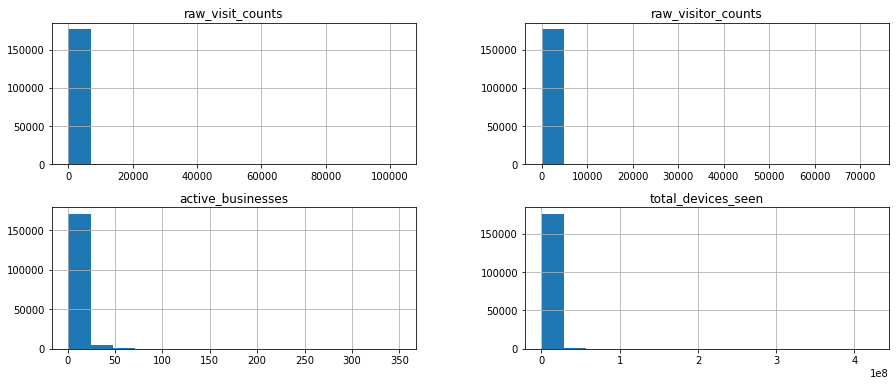

In [535]:
safeguard_df_filt[double_variables].hist(bins=15, figsize=(15, 6), layout=(2, 2))

In [536]:
cat_variables = safeguard_df_filt.select_dtypes('object').columns
cat_variables

Index(['region', 'county_name', 'naics_category'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



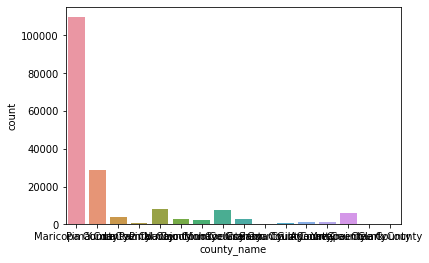

In [537]:
sns.countplot(safeguard_df_filt['county_name']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



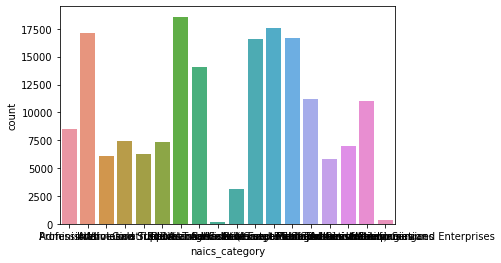

In [538]:
sns.countplot(safeguard_df_filt['naics_category']);


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



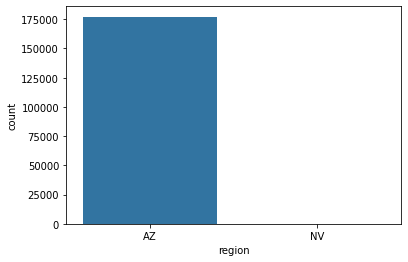

In [539]:
sns.countplot(safeguard_df_filt['region']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



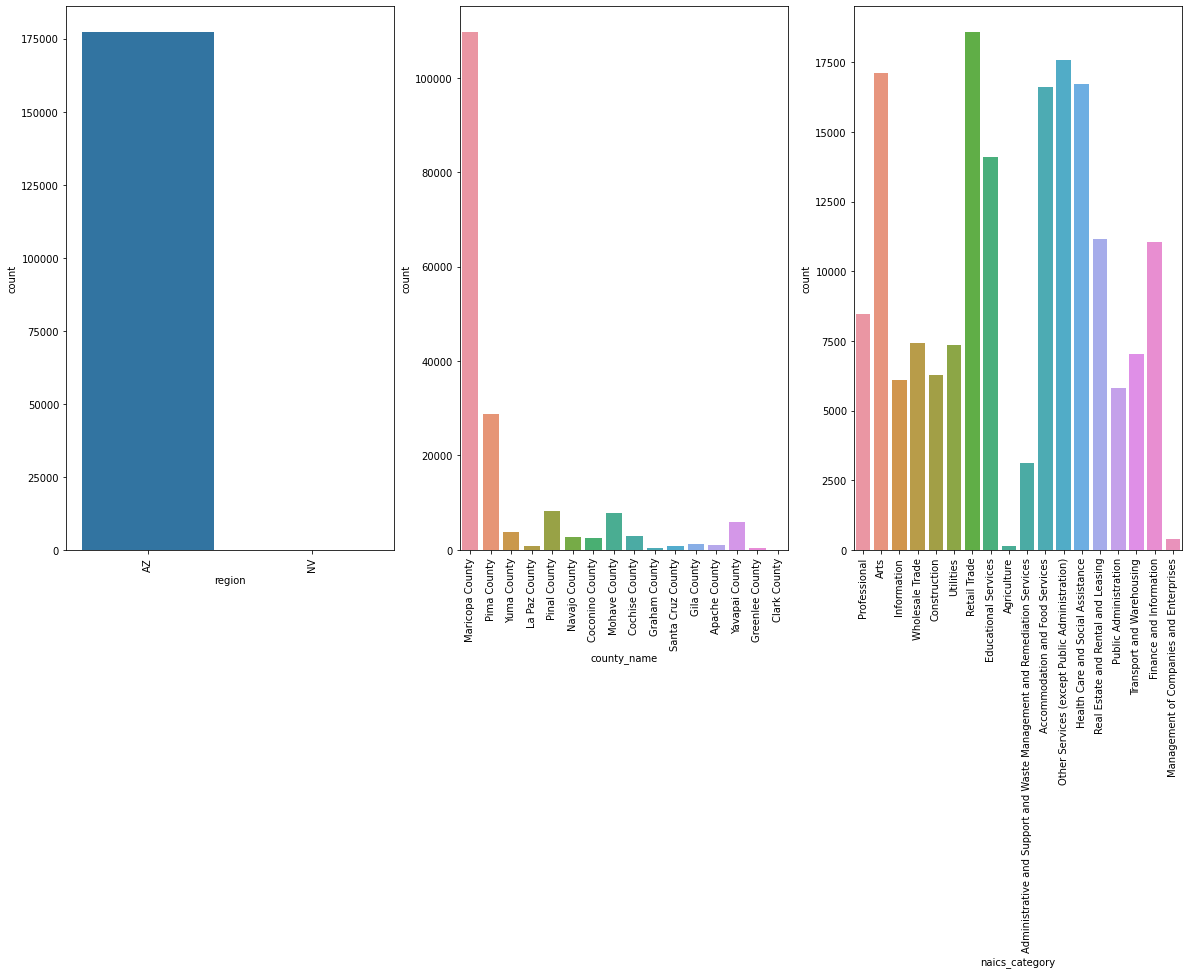

In [540]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(20, 10))
for variable, subplot in zip(cat_variables, ax.flatten()):
    sns.countplot(safeguard_df_filt[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [541]:
safeguard_df_filt.columns.to_list()

['region',
 'county_name',
 'naics_category',
 'date_range_start',
 'date_range_end',
 'raw_visit_counts',
 'raw_visitor_counts',
 'active_businesses',
 'date_interval',
 'total_devices_seen']

Plotting bar ggraph county names by target variables 

In [542]:
agg_Revenues_county = safeguard_df_filt.groupby('county_name', as_index= False)['raw_visit_counts'].sum()
agg_Revenues_county.head(10)




fig = go.Figure(data=go.Bar(x = agg_Revenues_county['county_name'].astype(dtype=str), 
                        y= agg_Revenues_county['raw_visit_counts'],
                        marker_color='indianred', text="visits"))



In [543]:
fig.update_layout({"title": 'Bar Graph of Number of Visits by County',
                   "xaxis": {"title":"County"},
                   "yaxis": {"title":"Total Number of visits"},
                   "showlegend": False})

fig.show()



In [544]:
agg_Revenues_county = safeguard_df_filt.groupby('county_name', as_index= False)['active_businesses'].sum()
agg_Revenues_county.head(10)




fig = go.Figure(data=go.Bar(x = agg_Revenues_county['county_name'].astype(dtype=str), 
                        y= agg_Revenues_county['active_businesses'],
                        marker_color='indianred', text="visits"))



In [545]:
fig.update_layout({"title": 'Bar Graph of Number of Active Business',
                   "xaxis": {"title":"County"},
                   "yaxis": {"title":"Total Number of Active Businesses"},
                   "showlegend": False})

fig.show()



In [546]:
agg_Revenues_county = safeguard_df_filt.groupby('county_name', as_index= False)['raw_visitor_counts'].sum()
agg_Revenues_county.head(10)




fig = go.Figure(data=go.Bar(x = agg_Revenues_county['county_name'].astype(dtype=str), 
                        y= agg_Revenues_county['raw_visitor_counts'],
                        marker_color='indianred', text="visits"))



In [547]:
fig.update_layout({"title": 'Bar Graph of Number of Visitors by County',
                   "xaxis": {"title":"County"},
                   "yaxis": {"title":"Total Number of visits"},
                   "showlegend": False})

fig.show()

Plotting category by target variable

In [548]:
agg_Revenues_cat = safeguard_df_filt.groupby('naics_category', as_index= False)['raw_visit_counts'].sum()
agg_Revenues_cat.head(10)




fig = go.Figure(data=go.Bar(x = agg_Revenues_cat['naics_category'].astype(dtype=str), 
                        y= agg_Revenues_cat['raw_visit_counts'],
                        marker_color='indianred', text="visits"))


In [549]:
fig.update_layout({"title": 'Bar Graph of Number of Visits for each category of Transactions',
                   "xaxis": {"title":"County"},
                   "yaxis": {"title":"Total Raw visit counts"},
                   "showlegend": False})

fig.show()
 

In [550]:
agg_Revenues_cat = safeguard_df_filt.groupby('naics_category', as_index= False)['active_businesses'].sum()
agg_Revenues_cat.head(10)




fig = go.Figure(data=go.Bar(x = agg_Revenues_cat['naics_category'].astype(dtype=str), 
                        y= agg_Revenues_cat['active_businesses'],
                        marker_color='indianred', text="visits"))

In [551]:
fig.update_layout({"title": 'Bar Graph of Number of Active Businesses for each category of Transactions',
                   "xaxis": {"title":"County"},
                   "yaxis": {"title":"Number of Businesses"},
                   "showlegend": False})

fig.show()

In [552]:
agg_Revenues_cat = safeguard_df_filt.groupby('naics_category', as_index= False)['raw_visitor_counts'].sum()
agg_Revenues_cat.head(10)




fig = go.Figure(data=go.Bar(x = agg_Revenues_cat['naics_category'].astype(dtype=str), 
                        y= agg_Revenues_cat['raw_visitor_counts'],
                        marker_color='indianred', text="visits"))

In [553]:
fig.update_layout({"title": 'Bar Graph of Raw Visitor County for each category of Transactions',
                   "xaxis": {"title":"County"},
                   "yaxis": {"title":"Number of Visitors Count"},
                   "showlegend": False})

fig.show()

In [554]:
agg_Revenues_cat = safeguard_df_filt.groupby('naics_category', as_index= False)['total_devices_seen'].sum()
agg_Revenues_cat.head(10)



#what is the context of the devices seen meanring?
fig = go.Figure(data=go.Bar(x = agg_Revenues_cat['naics_category'].astype(dtype=str), 
                        y= agg_Revenues_cat['total_devices_seen'],
                        marker_color='indianred', text="Devices"))



In [555]:
fig.update_layout({"title": 'Bar Graph of Raw Visitor County for each category of Transactions',
                   "xaxis": {"title":"County"},
                   "yaxis": {"title":"Number of Devices Seen"},
                   "showlegend": False})

fig.show()

Getting total of the potential regressors by date. We can see where thy

In [556]:
#getting dates for waw visit counts
total_visits_by_date = safeguard_df_filt.groupby('date_range_start', as_index= False)['raw_visit_counts'].sum()
total_visits_by_date = total_visits_by_date.sort_values('date_range_start', ascending = False).head(10)
total_visits_by_date['date_range_start'].unique()

array(['2022-01-03T00:00:00.000000000', '2021-12-27T00:00:00.000000000',
       '2021-12-20T00:00:00.000000000', '2021-12-13T00:00:00.000000000',
       '2021-12-06T00:00:00.000000000', '2021-11-29T00:00:00.000000000',
       '2021-11-22T00:00:00.000000000', '2021-11-15T00:00:00.000000000',
       '2021-11-08T00:00:00.000000000', '2021-11-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [557]:
#getting dates for raw visitor counts
total_visitor_by_date = safeguard_df_filt.groupby('date_range_start', as_index= False)['raw_visitor_counts'].sum()
total_visitor_by_date = total_visitor_by_date.sort_values('date_range_start', ascending = False).head(10)
total_visitor_by_date['date_range_start'].unique()

array(['2022-01-03T00:00:00.000000000', '2021-12-27T00:00:00.000000000',
       '2021-12-20T00:00:00.000000000', '2021-12-13T00:00:00.000000000',
       '2021-12-06T00:00:00.000000000', '2021-11-29T00:00:00.000000000',
       '2021-11-22T00:00:00.000000000', '2021-11-15T00:00:00.000000000',
       '2021-11-08T00:00:00.000000000', '2021-11-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [558]:
#getting dates  for active businesses
total_active_by_date = safeguard_df_filt.groupby('date_range_start', as_index= False)['active_businesses'].sum()
total_active_by_date = total_active_by_date.sort_values('date_range_start', ascending = False).head(10)
total_active_by_date['date_range_start'].unique()

array(['2022-01-03T00:00:00.000000000', '2021-12-27T00:00:00.000000000',
       '2021-12-20T00:00:00.000000000', '2021-12-13T00:00:00.000000000',
       '2021-12-06T00:00:00.000000000', '2021-11-29T00:00:00.000000000',
       '2021-11-22T00:00:00.000000000', '2021-11-15T00:00:00.000000000',
       '2021-11-08T00:00:00.000000000', '2021-11-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [559]:
print(double_variables)

['raw_visit_counts', 'raw_visitor_counts', 'active_businesses', 'total_devices_seen']


We need to also explore the correlations between resources

In [560]:
correlations = safeguard_df_filt[double_variables].corr()
correlations

,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen
raw_visit_counts,1.000000,0.989110,0.400189,0.330520
raw_visitor_counts,0.989110,1.000000,0.419725,0.345976
active_businesses,0.400189,0.419725,1.000000,0.810373
total_devices_seen,0.330520,0.345976,0.810373,1.000000


raw_visit_counts	and raw_visitor_counts are very correlated with each other. active_businesses and total_devices_seen are also very correlated with each other

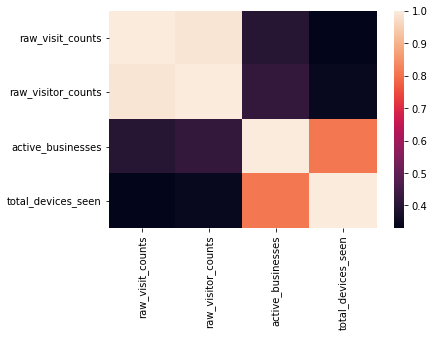

In [561]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlations)
plt.show()

Checking if the dates to see if thier overlapping

Checking the dates for the MEsa AZ dataset. Mesa, AZ dataset has monthly data from July 2015 to December 2021. The dates do overlap, so we can use the following dates.
The dataset for Safeguard has until 01-07-2019 and ends at 01-03-2022. 


Overall, this dataset is very usable. We just need to determine which variables to use as additional regressors. We do not want to use multiple regressors that are highly correlated with each other, so we need to use ones that would be the useful.

#Affinity Data

In [719]:
affinity_df = pd.read_csv('Affinity_County_Data_V2.csv', error_bad_lines = False, engine = "python")
affinity_df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





,transaction_week_starting_date,mcc_aggregate_code,mcc_aggregate_description,cardholder_county_fips,cardholder_county_name,cardholder_county_centroid,cardholder_state_name,cardholder_state_code,total_spend,total_cards,yago_transaction_week_starting_date,yago_total_spend,yago_total_cards,RowID
0,01/06/2020 12:00:00 AM,AAP,Apparel and Accessories,26129,Ogemaw County,POINT (-84.13 44.33),Michigan,MI,1145.15,19.0,01/07/2019 12:00:00 AM,2475.18,26.0,2020-01-06-AAP-26129
1,01/06/2020 12:00:00 AM,AAP,Apparel and Accessories,48129,Donley County,POINT (-100.81 34.97),Texas,TX,663.40,6.0,NaN,NaN,NaN,2020-01-06-AAP-48129
2,01/06/2020 12:00:00 AM,AAP,Apparel and Accessories,48083,Coleman County,POINT (-99.45 31.77),Texas,TX,270.89,6.0,NaN,NaN,NaN,2020-01-06-AAP-48083
3,01/06/2020 12:00:00 AM,AER,"Arts, Entertainment, Recreation",21083,Graves County,POINT (-88.65 36.72),Kentucky,KY,572.85,6.0,NaN,NaN,NaN,2020-01-06-AER-21083
4,01/06/2020 12:00:00 AM,AFH,"Agriculture, Forestry/Fishing, Hunting",48215,Hidalgo County,POINT (-98.18 26.4),Texas,TX,2094.47,18.0,01/07/2019 12:00:00 AM,581.29,18.0,2020-01-06-AFH-48215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247340,04/20/2020 12:00:00 AM,EDS,Education Services,42079,Luzerne County,POINT (-75.99 41.18),Pennsylvania,PA,13411.60,54.0,04/22/2019 12:00:00 AM,14811.43,107.0,2020-04-20-EDS-42079
247341,04/20/2020 12:00:00 AM,AAP,Apparel and Accessories,26035,Clare County,POINT (-84.85 43.99),Michigan,MI,1009.39,11.0,04/22/2019 12:00:00 AM,2191.75,19.0,2020-04-20-AAP-26035
247342,07/20/2020 12:00:00 AM,INF,Information,18145,Shelby County,POINT (-85.79 39.52),Indiana,IN,4137.26,49.0,07/22/2019 12:00:00 AM,18443.87,213.0,2020-07-20-INF-18145
247343,04/20/2020 12:00:00 AM,NaN,Missing or invalid Merchant Category Code (MCC),48223,Hopkins County,POINT (-95.56 33.15),Texas,TX,3536.23,5.0,04/22/2019 12:00:00 AM,2284.71,8.0,2020-04-20-NA-48223


In [772]:
affinity_df['mcc_aggregate_description'].unique()

array(['Apparel and Accessories', 'Arts, Entertainment, Recreation',
       'Agriculture, Forestry/Fishing, Hunting',
       'Home Improvement Centers', 'Consumer Electronics and Computers',
       'Education Services', 'Miscellaneous', 'Finance and Insurance',
       'General Merchandise Stores', 'Health Care and Social Assistance',
       'Grocery and Food Stores', 'Information',
       'Professional, Scientific, and Technical Services',
       'Administrative Support, Waste Management, and Remediation Services',
       'Missing or invalid Merchant Category Code (MCC)',
       'Real Estate, Rental and Leasing', 'Sporting Goods and Hobby',
       'Utilities', 'Accomodations and Food Services', 'Wholesale Trade',
       'Construction Services', 'Health and Personal Care Stores',
       'Other Services', 'Public Administration', 'Motor Vehicles',
       'Transportation and Warehousing',
       'Communications, Telecommunications Equipment'], dtype=object)

There might be too many different values for this to be able to incorporate it as a regressor

In [720]:
affinity_df.shape

(247345, 14)

##Lets filter out arizona

In [721]:
#filtering out arizona
ariz_df = affinity_df[affinity_df['cardholder_state_name'] == 'Arizona']
ariz_df.shape #we only have 451 rows of data after we filter out 

(451, 14)

In [722]:
ariz_df

,transaction_week_starting_date,mcc_aggregate_code,mcc_aggregate_description,cardholder_county_fips,cardholder_county_name,cardholder_county_centroid,cardholder_state_name,cardholder_state_code,total_spend,total_cards,yago_transaction_week_starting_date,yago_total_spend,yago_total_cards,RowID
828,05/04/2020 12:00:00 AM,WHT,Wholesale Trade,4012,La Paz County,POINT (-113.98 33.73),Arizona,AZ,1147.71,8.0,NaN,NaN,NaN,2020-05-04-WHT-04012
985,05/25/2020 12:00:00 AM,NaN,Missing or invalid Merchant Category Code (MCC),4009,Graham County,POINT (-109.89 32.93),Arizona,AZ,301.23,6.0,05/27/2019 12:00:00 AM,941.48,8.0,2020-05-25-NA-04009
1057,06/08/2020 12:00:00 AM,EDS,Education Services,4009,Graham County,POINT (-109.89 32.93),Arizona,AZ,810.61,5.0,NaN,NaN,NaN,2020-06-08-EDS-04009
1682,09/07/2020 12:00:00 AM,WHT,Wholesale Trade,4027,Yuma County,POINT (-113.91 32.77),Arizona,AZ,31062.89,55.0,09/09/2019 12:00:00 AM,27209.49,59.0,2020-09-07-WHT-04027
1831,09/21/2020 12:00:00 AM,CNS,Construction Services,4007,Gila County,POINT (-110.81 33.8),Arizona,AZ,18368.79,13.0,09/23/2019 12:00:00 AM,10421.12,14.0,2020-09-21-CNS-04007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245280,04/13/2020 12:00:00 AM,AER,"Arts, Entertainment, Recreation",4023,Santa Cruz County,POINT (-110.85 31.53),Arizona,AZ,2223.09,32.0,04/15/2019 12:00:00 AM,12681.32,112.0,2020-04-13-AER-04023
246146,04/13/2020 12:00:00 AM,CNS,Construction Services,4027,Yuma County,POINT (-113.91 32.77),Arizona,AZ,9551.74,14.0,04/15/2019 12:00:00 AM,17572.69,20.0,2020-04-13-CNS-04027
247045,02/22/2021 12:00:00 AM,AFH,"Agriculture, Forestry/Fishing, Hunting",4003,Cochise County,POINT (-109.75 31.88),Arizona,AZ,676.99,5.0,02/17/2020 12:00:00 AM,564.77,7.0,2021-02-22-AFH-04003
247063,07/27/2020 12:00:00 AM,AWS,"Administrative Support, Waste Management, and ...",4009,Graham County,POINT (-109.89 32.93),Arizona,AZ,1127.67,9.0,NaN,NaN,NaN,2020-07-27-AWS-04009


In [723]:
ariz_df.isnull().sum()/ariz_df.shape[0]*100

transaction_week_starting_date          0.000000
mcc_aggregate_code                      7.095344
mcc_aggregate_description               0.000000
cardholder_county_fips                  0.000000
cardholder_county_name                  0.000000
cardholder_county_centroid              0.000000
cardholder_state_name                   0.000000
cardholder_state_code                   0.000000
total_spend                             0.000000
total_cards                             0.000000
yago_transaction_week_starting_date    12.860310
yago_total_spend                       12.860310
yago_total_cards                       12.860310
RowID                                   0.000000
dtype: float64

Both the total_spend and total_cards have 0 null values. 

In [724]:
ariz_df['Date_parsed'] = ariz_df['transaction_week_starting_date'].astype(str).str[:10]
ariz_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,transaction_week_starting_date,mcc_aggregate_code,mcc_aggregate_description,cardholder_county_fips,cardholder_county_name,cardholder_county_centroid,cardholder_state_name,cardholder_state_code,total_spend,total_cards,yago_transaction_week_starting_date,yago_total_spend,yago_total_cards,RowID,Date_parsed
828,05/04/2020 12:00:00 AM,WHT,Wholesale Trade,4012,La Paz County,POINT (-113.98 33.73),Arizona,AZ,1147.71,8.0,NaN,NaN,NaN,2020-05-04-WHT-04012,05/04/2020
985,05/25/2020 12:00:00 AM,NaN,Missing or invalid Merchant Category Code (MCC),4009,Graham County,POINT (-109.89 32.93),Arizona,AZ,301.23,6.0,05/27/2019 12:00:00 AM,941.48,8.0,2020-05-25-NA-04009,05/25/2020
1057,06/08/2020 12:00:00 AM,EDS,Education Services,4009,Graham County,POINT (-109.89 32.93),Arizona,AZ,810.61,5.0,NaN,NaN,NaN,2020-06-08-EDS-04009,06/08/2020
1682,09/07/2020 12:00:00 AM,WHT,Wholesale Trade,4027,Yuma County,POINT (-113.91 32.77),Arizona,AZ,31062.89,55.0,09/09/2019 12:00:00 AM,27209.49,59.0,2020-09-07-WHT-04027,09/07/2020
1831,09/21/2020 12:00:00 AM,CNS,Construction Services,4007,Gila County,POINT (-110.81 33.8),Arizona,AZ,18368.79,13.0,09/23/2019 12:00:00 AM,10421.12,14.0,2020-09-21-CNS-04007,09/21/2020


In [725]:
ariz_df['month'] = ariz_df['Date_parsed'].astype(str).str[:2]
ariz_df['year'] = ariz_df['Date_parsed'].astype(str).str[6:]
ariz_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,transaction_week_starting_date,mcc_aggregate_code,mcc_aggregate_description,cardholder_county_fips,cardholder_county_name,cardholder_county_centroid,cardholder_state_name,cardholder_state_code,total_spend,total_cards,yago_transaction_week_starting_date,yago_total_spend,yago_total_cards,RowID,Date_parsed,month,year
828,05/04/2020 12:00:00 AM,WHT,Wholesale Trade,4012,La Paz County,POINT (-113.98 33.73),Arizona,AZ,1147.71,8.0,NaN,NaN,NaN,2020-05-04-WHT-04012,05/04/2020,05,2020
985,05/25/2020 12:00:00 AM,NaN,Missing or invalid Merchant Category Code (MCC),4009,Graham County,POINT (-109.89 32.93),Arizona,AZ,301.23,6.0,05/27/2019 12:00:00 AM,941.48,8.0,2020-05-25-NA-04009,05/25/2020,05,2020
1057,06/08/2020 12:00:00 AM,EDS,Education Services,4009,Graham County,POINT (-109.89 32.93),Arizona,AZ,810.61,5.0,NaN,NaN,NaN,2020-06-08-EDS-04009,06/08/2020,06,2020
1682,09/07/2020 12:00:00 AM,WHT,Wholesale Trade,4027,Yuma County,POINT (-113.91 32.77),Arizona,AZ,31062.89,55.0,09/09/2019 12:00:00 AM,27209.49,59.0,2020-09-07-WHT-04027,09/07/2020,09,2020
1831,09/21/2020 12:00:00 AM,CNS,Construction Services,4007,Gila County,POINT (-110.81 33.8),Arizona,AZ,18368.79,13.0,09/23/2019 12:00:00 AM,10421.12,14.0,2020-09-21-CNS-04007,09/21/2020,09,2020


In [726]:
print(', '.join(ariz_df.columns))


transaction_week_starting_date, mcc_aggregate_code, mcc_aggregate_description, cardholder_county_fips, cardholder_county_name, cardholder_county_centroid, cardholder_state_name, cardholder_state_code, total_spend, total_cards, yago_transaction_week_starting_date, yago_total_spend, yago_total_cards, RowID, Date_parsed, month, year


total_spend, total_cards are good indicators that we could use 

In [727]:
ariz_df['Date_parsed'] = pd.to_datetime(ariz_df['Date_parsed'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [728]:
# ariz_df.sort_values('Date_parsed').unique()

In [729]:
ariz_df['Date_parsed'].sort_values().unique()

array(['2020-01-06T00:00:00.000000000', '2020-01-13T00:00:00.000000000',
       '2020-01-20T00:00:00.000000000', '2020-01-27T00:00:00.000000000',
       '2020-02-03T00:00:00.000000000', '2020-02-10T00:00:00.000000000',
       '2020-02-17T00:00:00.000000000', '2020-02-24T00:00:00.000000000',
       '2020-03-02T00:00:00.000000000', '2020-03-09T00:00:00.000000000',
       '2020-03-16T00:00:00.000000000', '2020-03-23T00:00:00.000000000',
       '2020-03-30T00:00:00.000000000', '2020-04-06T00:00:00.000000000',
       '2020-04-13T00:00:00.000000000', '2020-04-20T00:00:00.000000000',
       '2020-04-27T00:00:00.000000000', '2020-05-04T00:00:00.000000000',
       '2020-05-11T00:00:00.000000000', '2020-05-18T00:00:00.000000000',
       '2020-05-25T00:00:00.000000000', '2020-06-01T00:00:00.000000000',
       '2020-06-08T00:00:00.000000000', '2020-06-15T00:00:00.000000000',
       '2020-06-22T00:00:00.000000000', '2020-06-29T00:00:00.000000000',
       '2020-07-06T00:00:00.000000000', '2020-07-13

The dates start at January 6, 2020 and end on July 2021. I am not sure if we have enough training data to use as we would want more training data. Depending on how many months we are predicting we may or may not need more training data. 

In [730]:
# ariz_df = ariz_df['Date_parsed'].sort_values()
# ariz_df

##EDA on Affinity Data

In [731]:
affinity_df.shape

(247345, 14)




*   https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697
*   https://usa.visa.com/content/dam/VCOM/download/merchants/visa-merchant-data-standards-manual.pdf



In [732]:
affinity_df.isnull().sum()

transaction_week_starting_date             0
mcc_aggregate_code                      8865
mcc_aggregate_description                  0
cardholder_county_fips                     0
cardholder_county_name                   119
cardholder_county_centroid               120
cardholder_state_name                    120
cardholder_state_code                    120
total_spend                                1
total_cards                                1
yago_transaction_week_starting_date    37303
yago_total_spend                       37303
yago_total_cards                       37303
RowID                                      1
dtype: int64

In [733]:
(affinity_df.isnull().sum()/affinity_df.shape[0])*100

transaction_week_starting_date          0.000000
mcc_aggregate_code                      3.584063
mcc_aggregate_description               0.000000
cardholder_county_fips                  0.000000
cardholder_county_name                  0.048111
cardholder_county_centroid              0.048515
cardholder_state_name                   0.048515
cardholder_state_code                   0.048515
total_spend                             0.000404
total_cards                             0.000404
yago_transaction_week_starting_date    15.081364
yago_total_spend                       15.081364
yago_total_cards                       15.081364
RowID                                   0.000404
dtype: float64

In [734]:
affinity_df.dtypes

transaction_week_starting_date          object
mcc_aggregate_code                      object
mcc_aggregate_description               object
cardholder_county_fips                   int64
cardholder_county_name                  object
cardholder_county_centroid              object
cardholder_state_name                   object
cardholder_state_code                   object
total_spend                            float64
total_cards                            float64
yago_transaction_week_starting_date     object
yago_total_spend                       float64
yago_total_cards                       float64
RowID                                   object
dtype: object

see the differences between the dates, so we can look at the granularity of the data

In [735]:
affinity_df['Date_parsed'] = affinity_df['transaction_week_starting_date'].astype(str).str[:10]
affinity_df.head()

,transaction_week_starting_date,mcc_aggregate_code,mcc_aggregate_description,cardholder_county_fips,cardholder_county_name,cardholder_county_centroid,cardholder_state_name,cardholder_state_code,total_spend,total_cards,yago_transaction_week_starting_date,yago_total_spend,yago_total_cards,RowID,Date_parsed
0,01/06/2020 12:00:00 AM,AAP,Apparel and Accessories,26129,Ogemaw County,POINT (-84.13 44.33),Michigan,MI,1145.15,19.0,01/07/2019 12:00:00 AM,2475.18,26.0,2020-01-06-AAP-26129,01/06/2020
1,01/06/2020 12:00:00 AM,AAP,Apparel and Accessories,48129,Donley County,POINT (-100.81 34.97),Texas,TX,663.40,6.0,NaN,NaN,NaN,2020-01-06-AAP-48129,01/06/2020
2,01/06/2020 12:00:00 AM,AAP,Apparel and Accessories,48083,Coleman County,POINT (-99.45 31.77),Texas,TX,270.89,6.0,NaN,NaN,NaN,2020-01-06-AAP-48083,01/06/2020
3,01/06/2020 12:00:00 AM,AER,"Arts, Entertainment, Recreation",21083,Graves County,POINT (-88.65 36.72),Kentucky,KY,572.85,6.0,NaN,NaN,NaN,2020-01-06-AER-21083,01/06/2020
4,01/06/2020 12:00:00 AM,AFH,"Agriculture, Forestry/Fishing, Hunting",48215,Hidalgo County,POINT (-98.18 26.4),Texas,TX,2094.47,18.0,01/07/2019 12:00:00 AM,581.29,18.0,2020-01-06-AFH-48215,01/06/2020


In [736]:
affinity_df['month'] = affinity_df['Date_parsed'].astype(str).str[:2]
affinity_df['year'] = affinity_df['Date_parsed'].astype(str).str[6:]

affinity_df['Date_parsed'] = pd.to_datetime(affinity_df['Date_parsed'])


In [737]:
affinity_df.head()

,transaction_week_starting_date,mcc_aggregate_code,mcc_aggregate_description,cardholder_county_fips,cardholder_county_name,cardholder_county_centroid,cardholder_state_name,cardholder_state_code,total_spend,total_cards,yago_transaction_week_starting_date,yago_total_spend,yago_total_cards,RowID,Date_parsed,month,year
0,01/06/2020 12:00:00 AM,AAP,Apparel and Accessories,26129,Ogemaw County,POINT (-84.13 44.33),Michigan,MI,1145.15,19.0,01/07/2019 12:00:00 AM,2475.18,26.0,2020-01-06-AAP-26129,2020-01-06,01,2020
1,01/06/2020 12:00:00 AM,AAP,Apparel and Accessories,48129,Donley County,POINT (-100.81 34.97),Texas,TX,663.40,6.0,NaN,NaN,NaN,2020-01-06-AAP-48129,2020-01-06,01,2020
2,01/06/2020 12:00:00 AM,AAP,Apparel and Accessories,48083,Coleman County,POINT (-99.45 31.77),Texas,TX,270.89,6.0,NaN,NaN,NaN,2020-01-06-AAP-48083,2020-01-06,01,2020
3,01/06/2020 12:00:00 AM,AER,"Arts, Entertainment, Recreation",21083,Graves County,POINT (-88.65 36.72),Kentucky,KY,572.85,6.0,NaN,NaN,NaN,2020-01-06-AER-21083,2020-01-06,01,2020
4,01/06/2020 12:00:00 AM,AFH,"Agriculture, Forestry/Fishing, Hunting",48215,Hidalgo County,POINT (-98.18 26.4),Texas,TX,2094.47,18.0,01/07/2019 12:00:00 AM,581.29,18.0,2020-01-06-AFH-48215,2020-01-06,01,2020


Looking at Dates.

In [738]:
# affinity_df.sort_values('Date_parsed').to_list()

In [739]:
affinity_df_dates_sorted = affinity_df.sort_values('Date_parsed')

In [740]:
affinity_df_dates_sorted['Date_parsed'].unique()

array(['2020-01-06T00:00:00.000000000', '2020-01-13T00:00:00.000000000',
       '2020-01-20T00:00:00.000000000', '2020-01-27T00:00:00.000000000',
       '2020-02-03T00:00:00.000000000', '2020-02-10T00:00:00.000000000',
       '2020-02-17T00:00:00.000000000', '2020-02-24T00:00:00.000000000',
       '2020-03-02T00:00:00.000000000', '2020-03-09T00:00:00.000000000',
       '2020-03-16T00:00:00.000000000', '2020-03-23T00:00:00.000000000',
       '2020-03-30T00:00:00.000000000', '2020-04-06T00:00:00.000000000',
       '2020-04-13T00:00:00.000000000', '2020-04-20T00:00:00.000000000',
       '2020-04-27T00:00:00.000000000', '2020-05-04T00:00:00.000000000',
       '2020-05-11T00:00:00.000000000', '2020-05-18T00:00:00.000000000',
       '2020-05-25T00:00:00.000000000', '2020-06-01T00:00:00.000000000',
       '2020-06-08T00:00:00.000000000', '2020-06-15T00:00:00.000000000',
       '2020-06-22T00:00:00.000000000', '2020-06-29T00:00:00.000000000',
       '2020-07-06T00:00:00.000000000', '2020-07-13

In [741]:
#seeing where the dates start
affinity_df_dates_sorted.head(5)

,transaction_week_starting_date,mcc_aggregate_code,mcc_aggregate_description,cardholder_county_fips,cardholder_county_name,cardholder_county_centroid,cardholder_state_name,cardholder_state_code,total_spend,total_cards,yago_transaction_week_starting_date,yago_total_spend,yago_total_cards,RowID,Date_parsed,month,year
0,01/06/2020 12:00:00 AM,AAP,Apparel and Accessories,26129,Ogemaw County,POINT (-84.13 44.33),Michigan,MI,1145.15,19.0,01/07/2019 12:00:00 AM,2475.18,26.0,2020-01-06-AAP-26129,2020-01-06,01,2020
89894,01/06/2020 12:00:00 AM,NaN,Missing or invalid Merchant Category Code (MCC),27001,Aitkin County,POINT (-93.42 46.61),Minnesota,MN,1958.48,8.0,01/07/2019 12:00:00 AM,988.34,8.0,2020-01-06-NA-27001,2020-01-06,01,2020
89890,01/06/2020 12:00:00 AM,PUA,Public Administration,27045,Fillmore County,POINT (-92.09 43.67),Minnesota,MN,1346.52,21.0,01/07/2019 12:00:00 AM,1444.00,18.0,2020-01-06-PUA-27045,2020-01-06,01,2020
89887,01/06/2020 12:00:00 AM,UTL,Utilities,39019,Carroll County,POINT (-81.09 40.58),Ohio,OH,1782.56,22.0,01/07/2019 12:00:00 AM,2315.00,19.0,2020-01-06-UTL-39019,2020-01-06,01,2020
89881,01/06/2020 12:00:00 AM,SGH,Sporting Goods and Hobby,18067,Howard County,POINT (-86.12 40.48),Indiana,IN,916.79,11.0,01/07/2019 12:00:00 AM,848.13,9.0,2020-01-06-SGH-18067,2020-01-06,01,2020


The data starts on January 4th, 2021

In [742]:
#seeing where the dates end
affinity_df_dates_sorted.tail(3)

,transaction_week_starting_date,mcc_aggregate_code,mcc_aggregate_description,cardholder_county_fips,cardholder_county_name,cardholder_county_centroid,cardholder_state_name,cardholder_state_code,total_spend,total_cards,yago_transaction_week_starting_date,yago_total_spend,yago_total_cards,RowID,Date_parsed,month,year
80794,07/19/2021 12:00:00 AM,MOV,Motor Vehicles,20135,Ness County,POINT (-99.92 38.48),Kansas,KS,731.41,7.0,NaN,NaN,NaN,2021-07-19-MOV-20135,2021-07-19,07,2021
80722,07/19/2021 12:00:00 AM,MOV,Motor Vehicles,1131,Wilcox County,POINT (-87.31 31.99),Alabama,AL,1218.05,13.0,07/13/2020 12:00:00 AM,2566.03,11.0,2021-07-19-MOV-01131,2021-07-19,07,2021
80290,07/19/2021 12:00:00 AM,INF,Information,46055,Haakon County,POINT (-101.54 44.29),South Dakota,SD,949.71,8.0,07/13/2020 12:00:00 AM,511.52,5.0,2021-07-19-INF-46055,2021-07-19,07,2021


In [743]:
affinity_df_dates_sorted.dtypes

transaction_week_starting_date                 object
mcc_aggregate_code                             object
mcc_aggregate_description                      object
cardholder_county_fips                          int64
cardholder_county_name                         object
cardholder_county_centroid                     object
cardholder_state_name                          object
cardholder_state_code                          object
total_spend                                   float64
total_cards                                   float64
yago_transaction_week_starting_date            object
yago_total_spend                              float64
yago_total_cards                              float64
RowID                                          object
Date_parsed                            datetime64[ns]
month                                          object
year                                           object
dtype: object

The data ends October 25th, 2021

Seeing the differnece of days between consecutive date rows to see the granularity of the data

In [744]:
# affinity_df_dates_sorted['Date_parsed'] = pd.to_datetime(affinity_df_dates_sorted['Date_parsed'])

In [745]:
# affinity_df_dates_sorted.dtypes

In [746]:
affinity_df_dates_sorted['date_diff'] = affinity_df_dates_sorted['Date_parsed'] - affinity_df_dates_sorted['Date_parsed'].shift(1)

# affinity_df['date_diff'] = affinity_df['date_diff'].fillna(0)

In [747]:
affinity_df_dates_sorted.head()

,transaction_week_starting_date,mcc_aggregate_code,mcc_aggregate_description,cardholder_county_fips,cardholder_county_name,cardholder_county_centroid,cardholder_state_name,cardholder_state_code,total_spend,total_cards,yago_transaction_week_starting_date,yago_total_spend,yago_total_cards,RowID,Date_parsed,month,year,date_diff
0,01/06/2020 12:00:00 AM,AAP,Apparel and Accessories,26129,Ogemaw County,POINT (-84.13 44.33),Michigan,MI,1145.15,19.0,01/07/2019 12:00:00 AM,2475.18,26.0,2020-01-06-AAP-26129,2020-01-06,01,2020,NaT
89894,01/06/2020 12:00:00 AM,NaN,Missing or invalid Merchant Category Code (MCC),27001,Aitkin County,POINT (-93.42 46.61),Minnesota,MN,1958.48,8.0,01/07/2019 12:00:00 AM,988.34,8.0,2020-01-06-NA-27001,2020-01-06,01,2020,0 days
89890,01/06/2020 12:00:00 AM,PUA,Public Administration,27045,Fillmore County,POINT (-92.09 43.67),Minnesota,MN,1346.52,21.0,01/07/2019 12:00:00 AM,1444.00,18.0,2020-01-06-PUA-27045,2020-01-06,01,2020,0 days
89887,01/06/2020 12:00:00 AM,UTL,Utilities,39019,Carroll County,POINT (-81.09 40.58),Ohio,OH,1782.56,22.0,01/07/2019 12:00:00 AM,2315.00,19.0,2020-01-06-UTL-39019,2020-01-06,01,2020,0 days
89881,01/06/2020 12:00:00 AM,SGH,Sporting Goods and Hobby,18067,Howard County,POINT (-86.12 40.48),Indiana,IN,916.79,11.0,01/07/2019 12:00:00 AM,848.13,9.0,2020-01-06-SGH-18067,2020-01-06,01,2020,0 days


In [748]:
affinity_df_dates_sorted

,transaction_week_starting_date,mcc_aggregate_code,mcc_aggregate_description,cardholder_county_fips,cardholder_county_name,cardholder_county_centroid,cardholder_state_name,cardholder_state_code,total_spend,total_cards,yago_transaction_week_starting_date,yago_total_spend,yago_total_cards,RowID,Date_parsed,month,year,date_diff
0,01/06/2020 12:00:00 AM,AAP,Apparel and Accessories,26129,Ogemaw County,POINT (-84.13 44.33),Michigan,MI,1145.15,19.0,01/07/2019 12:00:00 AM,2475.18,26.0,2020-01-06-AAP-26129,2020-01-06,01,2020,NaT
89894,01/06/2020 12:00:00 AM,NaN,Missing or invalid Merchant Category Code (MCC),27001,Aitkin County,POINT (-93.42 46.61),Minnesota,MN,1958.48,8.0,01/07/2019 12:00:00 AM,988.34,8.0,2020-01-06-NA-27001,2020-01-06,01,2020,0 days
89890,01/06/2020 12:00:00 AM,PUA,Public Administration,27045,Fillmore County,POINT (-92.09 43.67),Minnesota,MN,1346.52,21.0,01/07/2019 12:00:00 AM,1444.00,18.0,2020-01-06-PUA-27045,2020-01-06,01,2020,0 days
89887,01/06/2020 12:00:00 AM,UTL,Utilities,39019,Carroll County,POINT (-81.09 40.58),Ohio,OH,1782.56,22.0,01/07/2019 12:00:00 AM,2315.00,19.0,2020-01-06-UTL-39019,2020-01-06,01,2020,0 days
89881,01/06/2020 12:00:00 AM,SGH,Sporting Goods and Hobby,18067,Howard County,POINT (-86.12 40.48),Indiana,IN,916.79,11.0,01/07/2019 12:00:00 AM,848.13,9.0,2020-01-06-SGH-18067,2020-01-06,01,2020,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80791,07/19/2021 12:00:00 AM,MOV,Motor Vehicles,20083,Hodgeman County,POINT (-99.9 38.09),Kansas,KS,767.00,7.0,07/13/2020 12:00:00 AM,290.31,5.0,2021-07-19-MOV-20083,2021-07-19,07,2021,0 days
80793,07/19/2021 12:00:00 AM,MOV,Motor Vehicles,20081,Haskell County,POINT (-100.87 37.56),Kansas,KS,2045.10,11.0,07/13/2020 12:00:00 AM,1503.21,5.0,2021-07-19-MOV-20081,2021-07-19,07,2021,0 days
80794,07/19/2021 12:00:00 AM,MOV,Motor Vehicles,20135,Ness County,POINT (-99.92 38.48),Kansas,KS,731.41,7.0,NaN,NaN,NaN,2021-07-19-MOV-20135,2021-07-19,07,2021,0 days
80722,07/19/2021 12:00:00 AM,MOV,Motor Vehicles,1131,Wilcox County,POINT (-87.31 31.99),Alabama,AL,1218.05,13.0,07/13/2020 12:00:00 AM,2566.03,11.0,2021-07-19-MOV-01131,2021-07-19,07,2021,0 days


In [749]:
print(affinity_df_dates_sorted['date_diff'].median())
print(affinity_df_dates_sorted['date_diff'].mean())
print(affinity_df_dates_sorted['date_diff'].min())
print(affinity_df_dates_sorted['date_diff'].max())


0 days 00:00:00
0 days 00:03:15.614205317
0 days 00:00:00
7 days 00:00:00


In [750]:
list_indices_1 = affinity_df_dates_sorted[affinity_df_dates_sorted['date_diff'] == '-364 days +00:00:00'].index.to_list()

In [751]:
list_indices_2 = affinity_df_dates_sorted[affinity_df_dates_sorted['date_diff'] == '371 days 00:00:00'].index.to_list()

In [752]:
list_indices = list_indices_1 + list_indices_2

In [753]:
affinity_df_dates_sorted.iloc[list_indices]

,transaction_week_starting_date,mcc_aggregate_code,mcc_aggregate_description,cardholder_county_fips,cardholder_county_name,cardholder_county_centroid,cardholder_state_name,cardholder_state_code,total_spend,total_cards,yago_transaction_week_starting_date,yago_total_spend,yago_total_cards,RowID,Date_parsed,month,year,date_diff


In [754]:
print(affinity_df['total_spend'].min())
print(affinity_df['total_spend'].median())
print(affinity_df['total_spend'].max())
print(affinity_df['total_spend'].mean())


15.38
1733.0
383470.84
3403.7143617390725


Lets look at the differences between yago estimated revenue and regular revenue

In [755]:
affinity_df['revenue_diff'] = abs(affinity_df['total_spend'] - affinity_df['yago_total_spend'])

In [756]:
print(affinity_df['revenue_diff'].min())
print(affinity_df['revenue_diff'].median())
print(affinity_df['revenue_diff'].max())
print(affinity_df['revenue_diff'].mean())

0.0
963.2899999999997
588603.2
2367.2990047228095


Plotting distributions of the numerical variables

In [757]:
affinity_df.dtypes

transaction_week_starting_date                 object
mcc_aggregate_code                             object
mcc_aggregate_description                      object
cardholder_county_fips                          int64
cardholder_county_name                         object
cardholder_county_centroid                     object
cardholder_state_name                          object
cardholder_state_code                          object
total_spend                                   float64
total_cards                                   float64
yago_transaction_week_starting_date            object
yago_total_spend                              float64
yago_total_cards                              float64
RowID                                          object
Date_parsed                            datetime64[ns]
month                                          object
year                                           object
revenue_diff                                  float64
dtype: object

In [758]:
int_variables_affinity = affinity_df.select_dtypes('int64').columns.to_list()
print(int_variables_affinity)

double_variables_affinity = affinity_df.select_dtypes('float64').columns.to_list()
print(double_variables_affinity)

numerical_variables_affinity = int_variables_affinity + double_variables_affinity
print(numerical_variables_affinity)

['cardholder_county_fips']
['total_spend', 'total_cards', 'yago_total_spend', 'yago_total_cards', 'revenue_diff']
['cardholder_county_fips', 'total_spend', 'total_cards', 'yago_total_spend', 'yago_total_cards', 'revenue_diff']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0350814d0>,
      dtype=object)

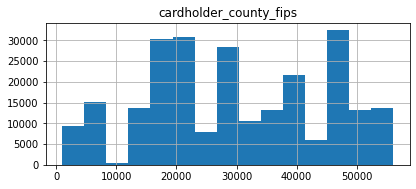

In [759]:
affinity_df[int_variables_affinity].hist(bins=15, figsize=(15, 6), layout=(2, 2))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0351ab490>,
      dtype=object)

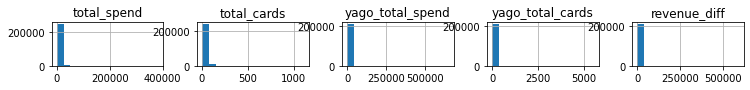

In [760]:
affinity_df[double_variables_affinity].hist(bins=15, figsize=(15, 6), layout=(6, 6))


Plotting countplot of  categorical variables

In [761]:
cat_variables_affinity = affinity_df.select_dtypes('object').columns.to_list()
cat_variables_affinity

['transaction_week_starting_date',
 'mcc_aggregate_code',
 'mcc_aggregate_description',
 'cardholder_county_name',
 'cardholder_county_centroid',
 'cardholder_state_name',
 'cardholder_state_code',
 'yago_transaction_week_starting_date',
 'RowID',
 'month',
 'year']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

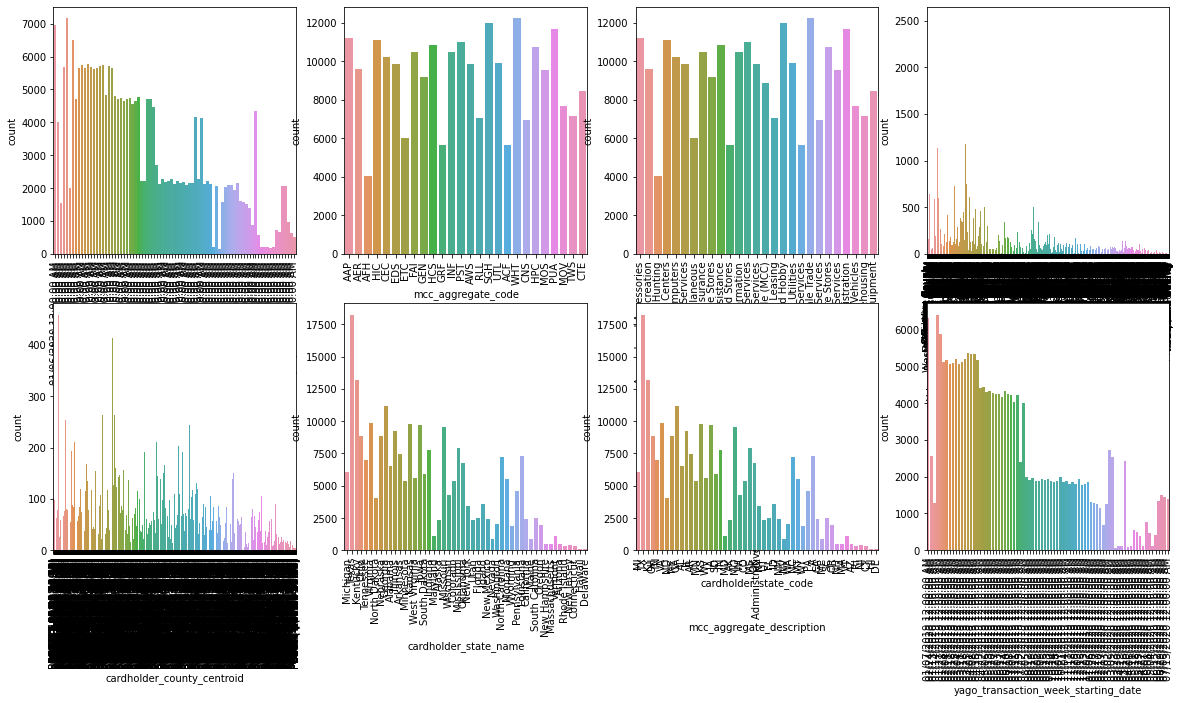

In [762]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(cat_variables_affinity, ax.flatten()):
    sns.countplot(affinity_df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

PLotting trend lines for total_spend, yago_total_spend                       
yago_total_cards                

In [763]:
#create a copy of the dataset for EDA to plot some graphs
affinity_df_eda = affinity_df.copy()


In [764]:
#creating a year-month column to easily graph 
affinity_df_eda['Year-Month'] = affinity_df['year'].astype(str) + '-' + affinity_df['month'].astype(str) 

In [765]:
affinity_df_eda.head()

,transaction_week_starting_date,mcc_aggregate_code,mcc_aggregate_description,cardholder_county_fips,cardholder_county_name,cardholder_county_centroid,cardholder_state_name,cardholder_state_code,total_spend,total_cards,yago_transaction_week_starting_date,yago_total_spend,yago_total_cards,RowID,Date_parsed,month,year,revenue_diff,Year-Month
0,01/06/2020 12:00:00 AM,AAP,Apparel and Accessories,26129,Ogemaw County,POINT (-84.13 44.33),Michigan,MI,1145.15,19.0,01/07/2019 12:00:00 AM,2475.18,26.0,2020-01-06-AAP-26129,2020-01-06,01,2020,1330.03,2020-01
1,01/06/2020 12:00:00 AM,AAP,Apparel and Accessories,48129,Donley County,POINT (-100.81 34.97),Texas,TX,663.40,6.0,NaN,NaN,NaN,2020-01-06-AAP-48129,2020-01-06,01,2020,NaN,2020-01
2,01/06/2020 12:00:00 AM,AAP,Apparel and Accessories,48083,Coleman County,POINT (-99.45 31.77),Texas,TX,270.89,6.0,NaN,NaN,NaN,2020-01-06-AAP-48083,2020-01-06,01,2020,NaN,2020-01
3,01/06/2020 12:00:00 AM,AER,"Arts, Entertainment, Recreation",21083,Graves County,POINT (-88.65 36.72),Kentucky,KY,572.85,6.0,NaN,NaN,NaN,2020-01-06-AER-21083,2020-01-06,01,2020,NaN,2020-01
4,01/06/2020 12:00:00 AM,AFH,"Agriculture, Forestry/Fishing, Hunting",48215,Hidalgo County,POINT (-98.18 26.4),Texas,TX,2094.47,18.0,01/07/2019 12:00:00 AM,581.29,18.0,2020-01-06-AFH-48215,2020-01-06,01,2020,1513.18,2020-01


Plotting total spend over months

In [766]:
#aggregate the data by month to plot trend lines over months
affinity_df_monthly_spend = affinity_df_eda.groupby('Year-Month', as_index = False)['total_spend'].sum()
affinity_df_monthly_spend

,Year-Month,total_spend
0,2020-01,1.008144e+08
1,2020-02,8.706752e+07
2,2020-03,1.021061e+08
3,2020-04,7.559326e+07
4,2020-05,6.998741e+07
5,2020-06,8.719733e+07
6,2020-07,6.356739e+07
7,2020-08,3.690482e+07
8,2020-09,2.785456e+07
9,2020-10,2.648358e+07


In [767]:
px.line(affinity_df_monthly_spend, 
        x="Year-Month", 
        y="total_spend", 
        #color="Category Code Description", 
        #text="Revenue",
       title="Total Spent over months")


Plotting yago total spend over months

In [768]:
#aggregate the data by month to plot trend lines over months
affinity_df_eda_monthly_yagospend = affinity_df_eda.groupby('Year-Month', as_index = False)['total_cards'].sum()
affinity_df_eda_monthly_yagospend

,Year-Month,total_cards
0,2020-01,761171.0
1,2020-02,637998.0
2,2020-03,744335.0
3,2020-04,555021.0
4,2020-05,496828.0
5,2020-06,588062.0
6,2020-07,413706.0
7,2020-08,233480.0
8,2020-09,184517.0
9,2020-10,171814.0


In [769]:
px.line(affinity_df_eda_monthly_yagospend, 
        x = "Year-Month", 
        y = "total_cards", 
        #color="Category Code Description", 
        #text="Revenue",
        title = "Total cards Spent over months")


Plotting total cards over months

In [770]:
#aggregate the data by month to plot trend lines over months
womply_df_monthly_yagocards = affinity_df_eda.groupby('Year-Month', as_index = False)['yago_total_cards'].sum()
womply_df_monthly_yagocards

,Year-Month,yago_total_cards
0,2020-01,776604.0
1,2020-02,660466.0
2,2020-03,962148.0
3,2020-04,767188.0
4,2020-05,611247.0
5,2020-06,679247.0
6,2020-07,473724.0
7,2020-08,260154.0
8,2020-09,213420.0
9,2020-10,202345.0


In [771]:
px.line(affinity_df_eda, 
        x = "Year-Month", 
        y = "yago_total_cards", 
        #color="Category Code Description", 
        #text="Revenue",
        title = "Total Cards over months")


Output hidden; open in https://colab.research.google.com to view.